# Категорийные (категориальные) графики - распределение по категориям
---
Ранее были рассмотрены вычисления различных метрик (среднее значение, количество и т.д.) для категорий и их сравнение друг с другом. Теперь, рассмотрим визуализацию распределений внутри категорий.

К графикам распределения по категориям относятся:
* Boxplot
* Violinplot
* Swarmplot
* Boxenplot (Letter-Value Plot)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## График Boxplot
Такой график отбражает распределение непрерывной переменной. Он использует квартили.   
Квартили разделяют все данные на 4 равных интервала по количеству точек:
    25% точек в нижнем квартиле
    25% точек в верхнем квартиле
    точка находящаяся по середине - 50% процентиль (Q2) это медиана

Гравик Boxplot для одной переменной выглядит следующим образом:

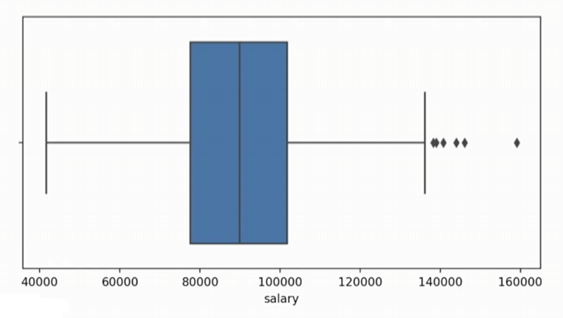

По середине прямоугольника есть линия, которая находится в точке медианы. Она разделяет все данные пополам. Размер прямоугольника - расстояние, которое называется интерквартильным размахом (диапазоном), который определяет ширину прямоугольника. В этом диапазоне содержится 50% всех точек: левая граница прямоугольника - это 25 процентиль, правая - 75 процентиль. Получается, что левее прямоугольника содержится 25% точек - это точки с наименьшими зарплатами, внутри прямоугольника содержится 50% точек - это серединные значения зарплат, оставшиеся 25% точек находятся правее прямоугольника - это высокие зарплаты.  
Размер линий отложенных слева и справа от прямоугольника равен (1,5 * интервартильный размах). Как правило большинство точек укладываются в эти "усы", точки не укладывающиеся в этот диапазон называются выбросами и отображаются на графике отдельными маркерами.

В итоге график Boxplot визуально отображает основные статистические характеристики распределения данных. График также может располагаться в вертикальном положении:

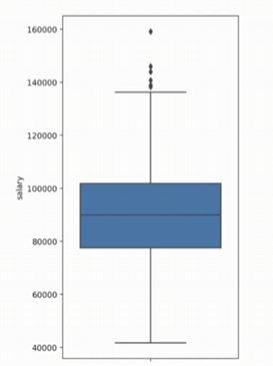

Также графики можно построить для отдельных категорий:

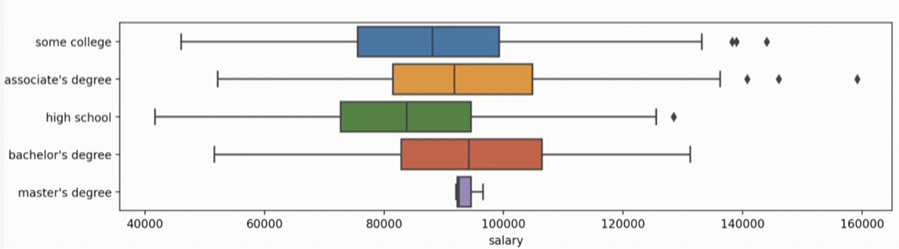

***Получим распределение оценок для всех студентов без разбиения на какие-либо категории***

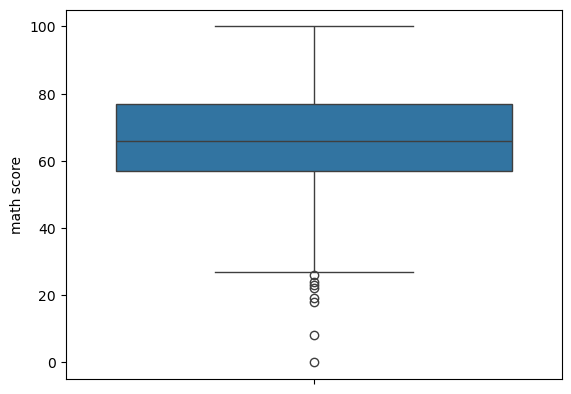

In [19]:
sns.boxplot(data=df, y='math score')
plt.show()

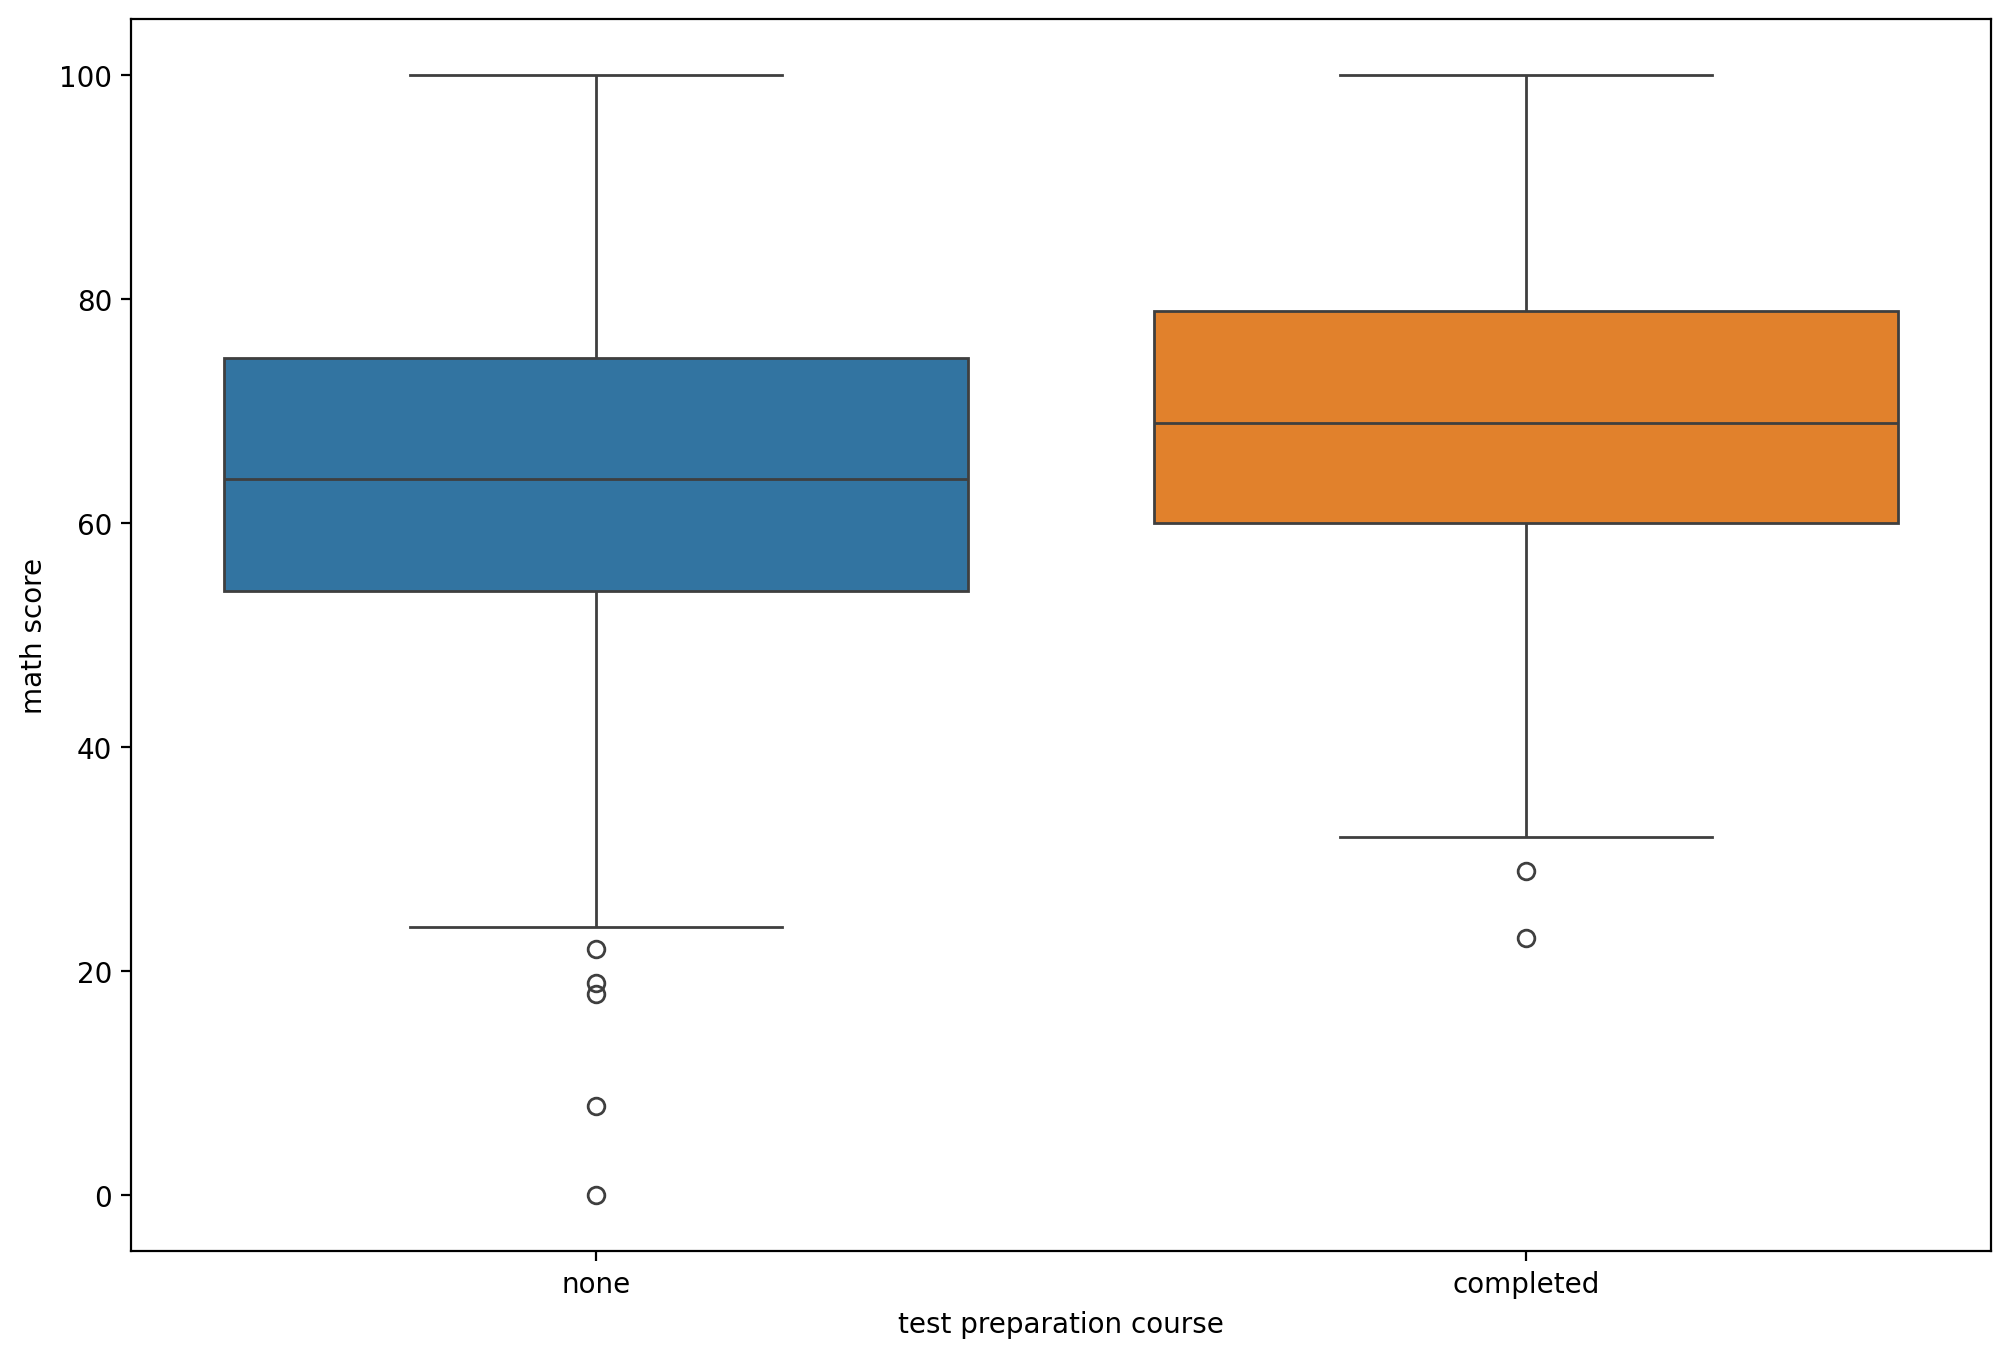

In [33]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, y='math score', x='test preparation course', hue='test preparation course')
plt.show()

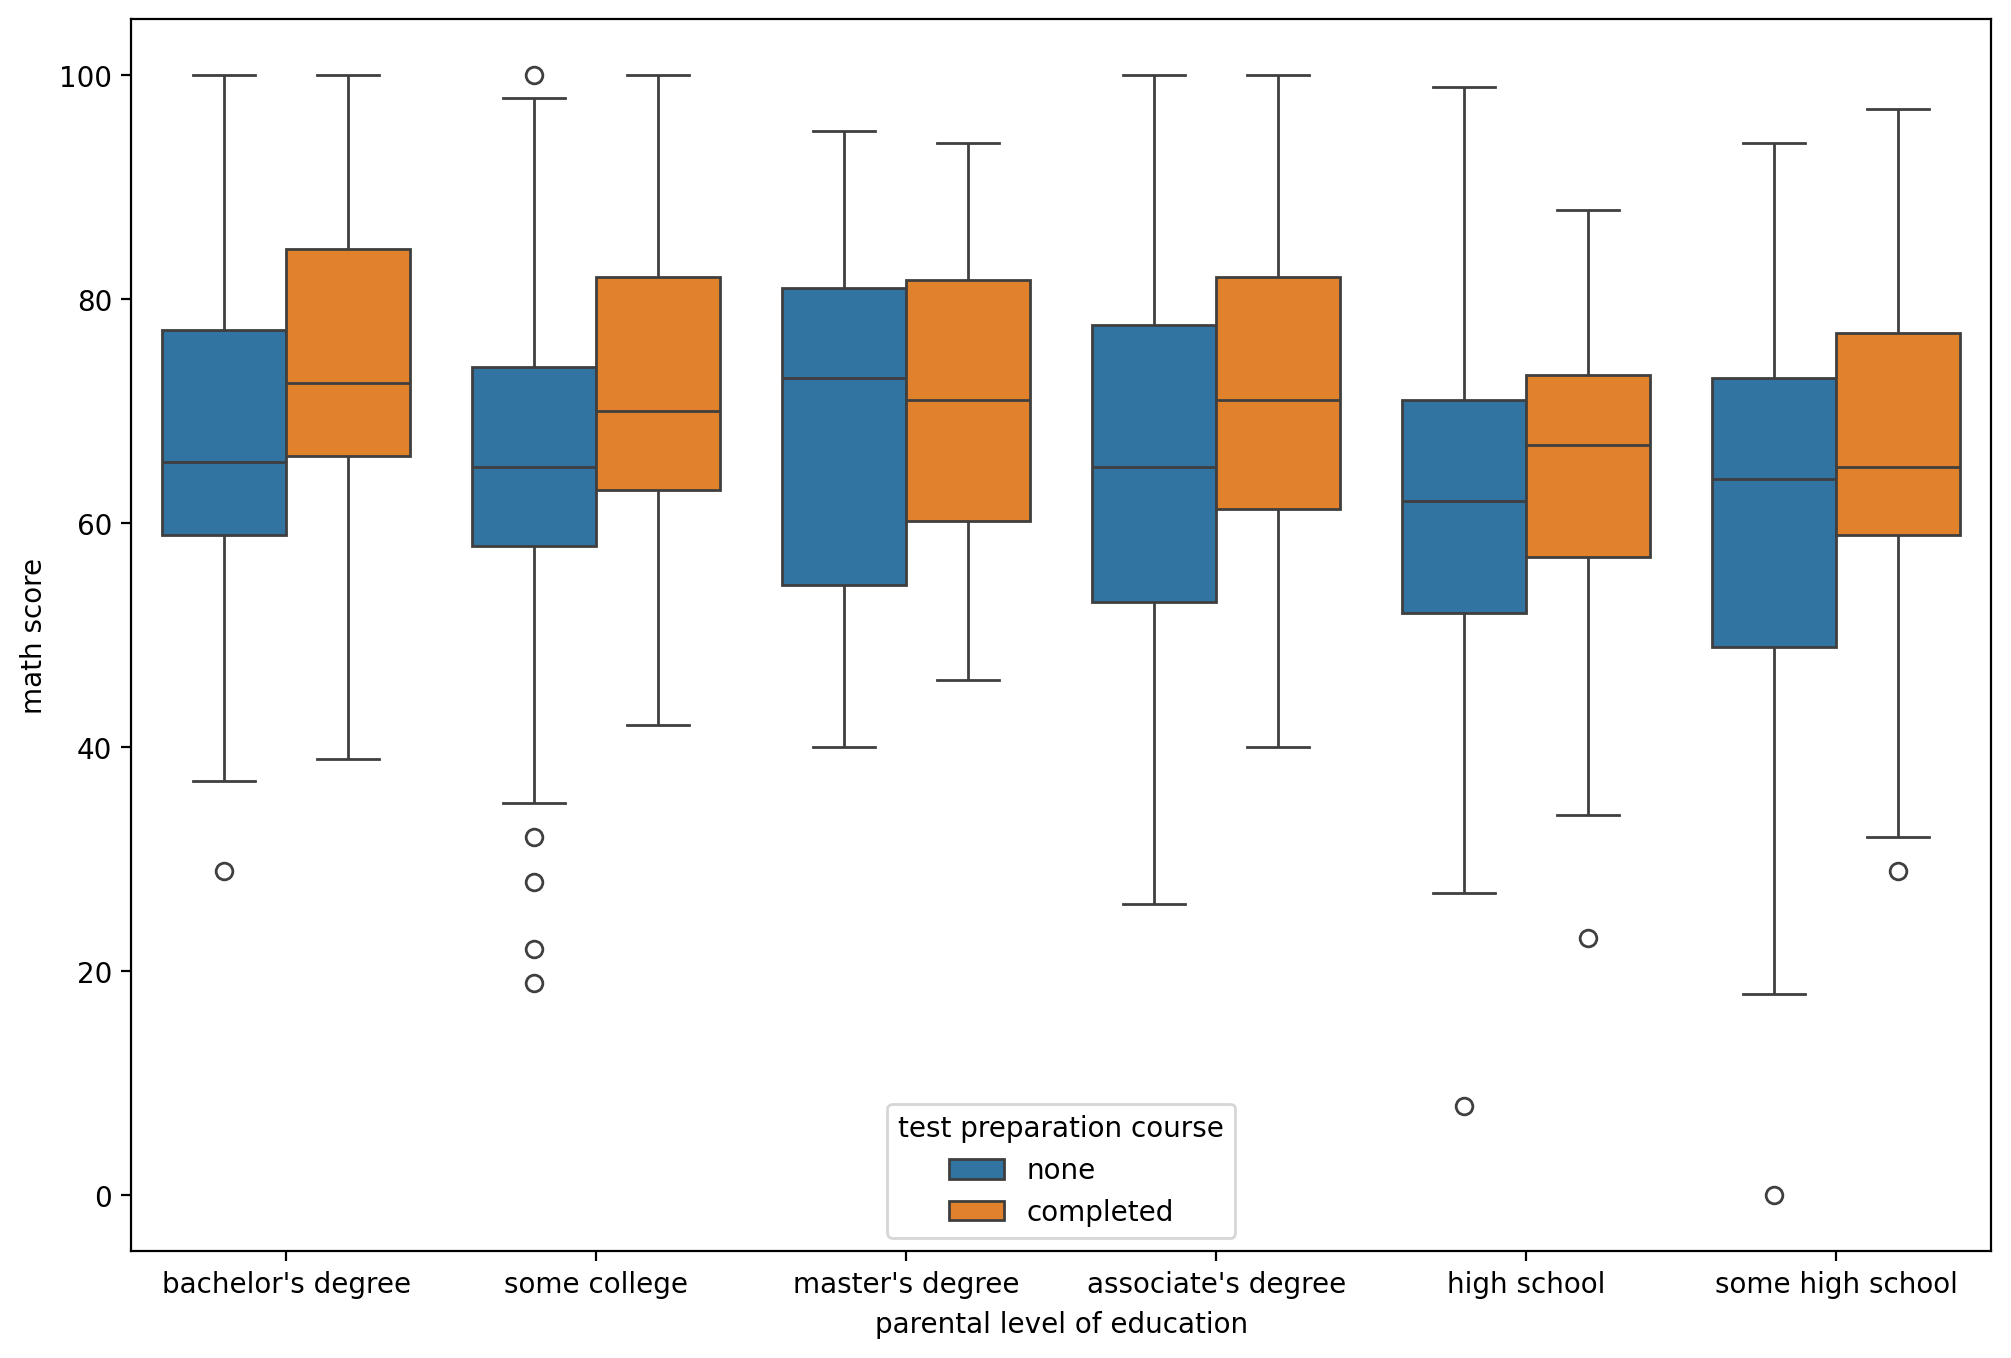

In [35]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, y='math score', x='parental level of education', hue='test preparation course')
plt.show()

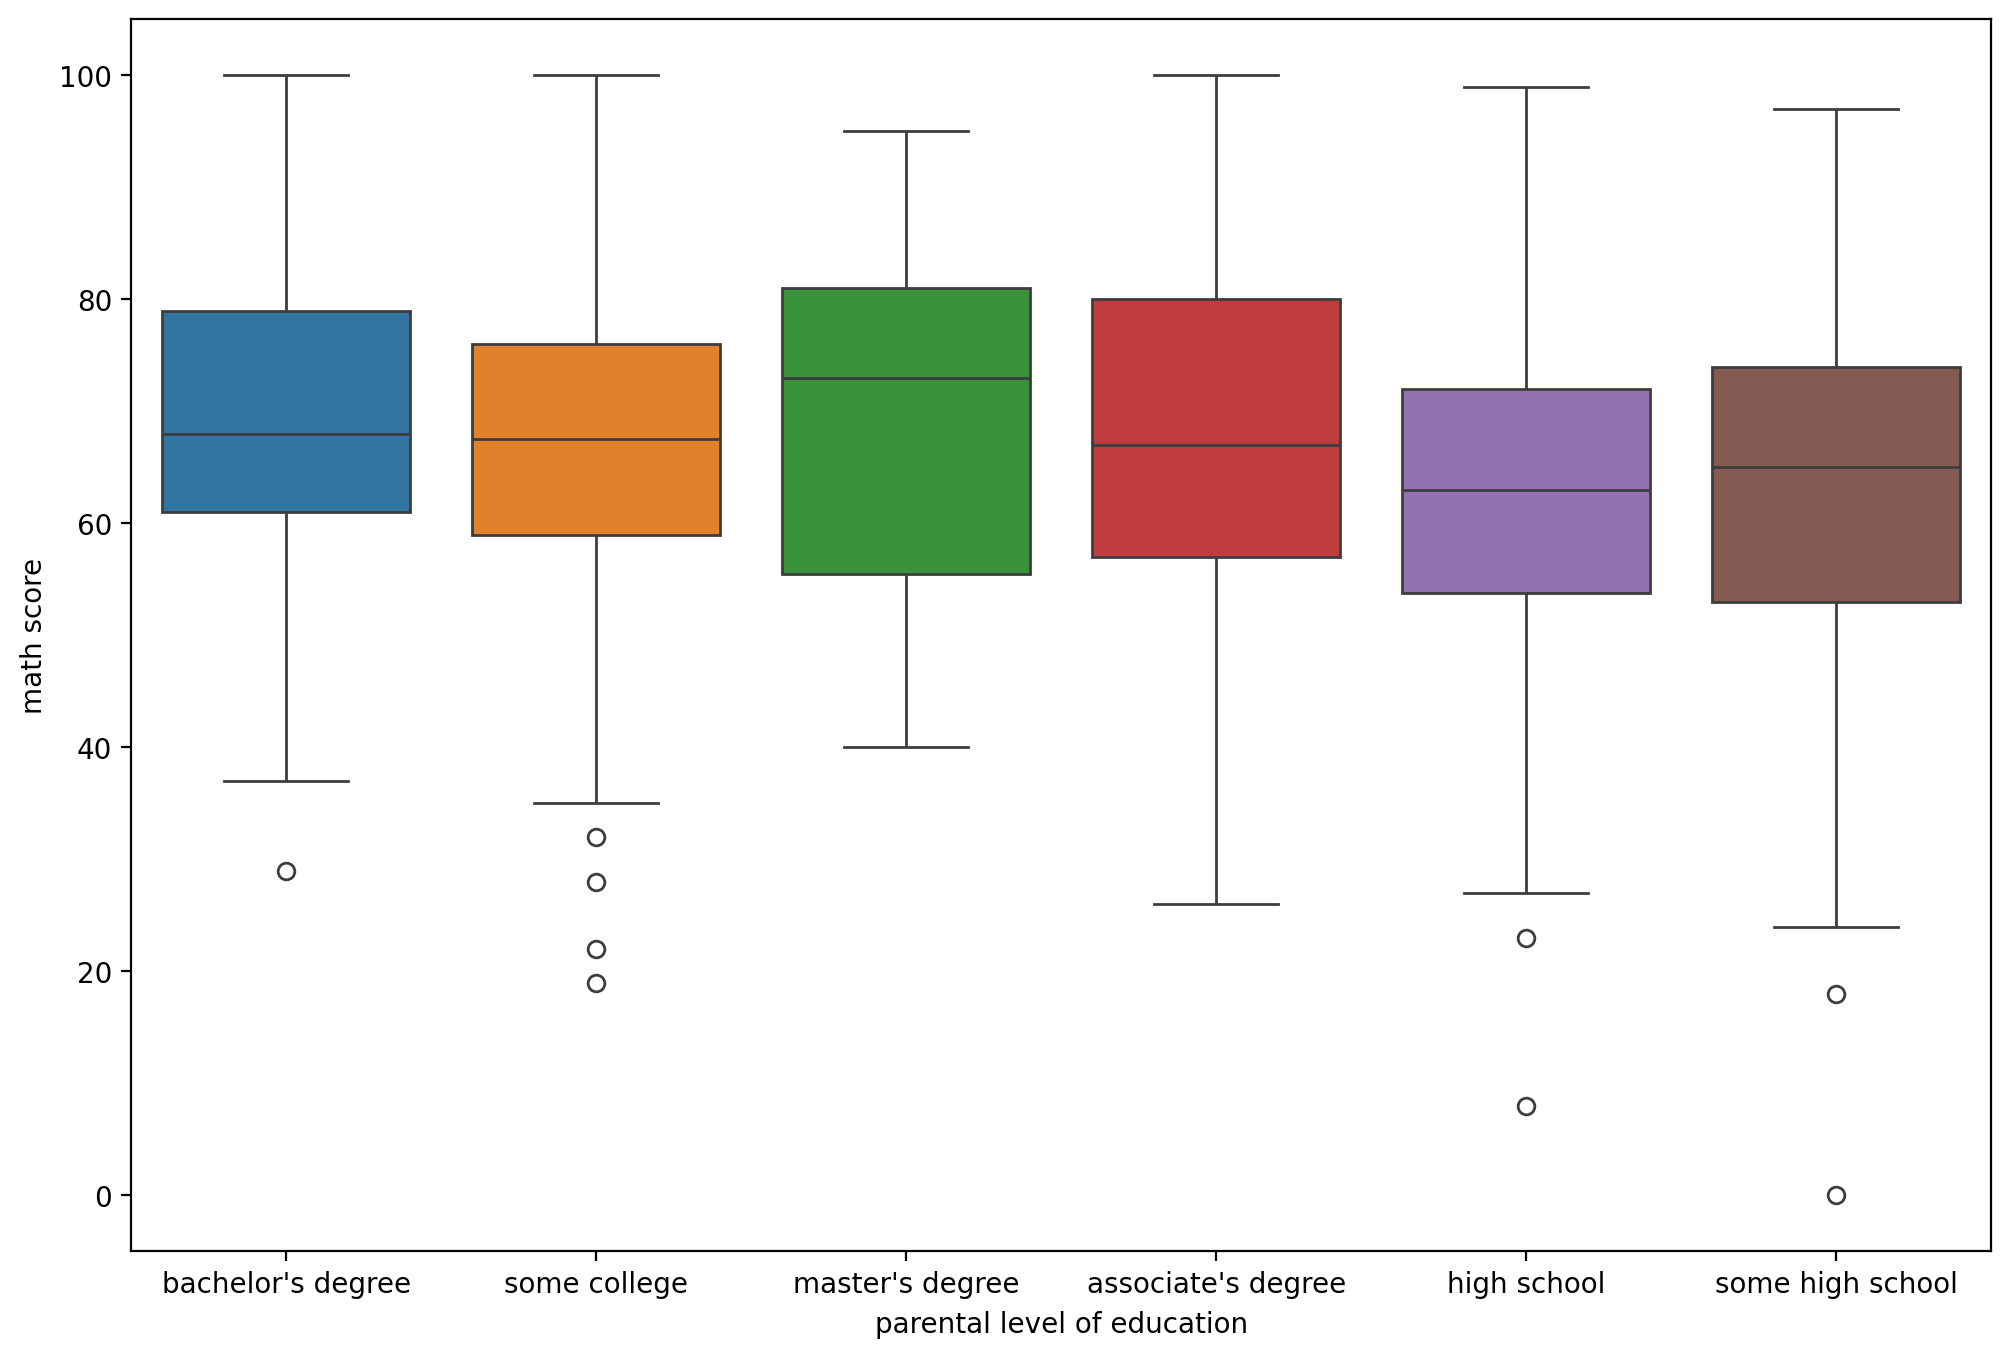

In [46]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, y='math score', x='parental level of education', hue='parental level of education')
plt.show()

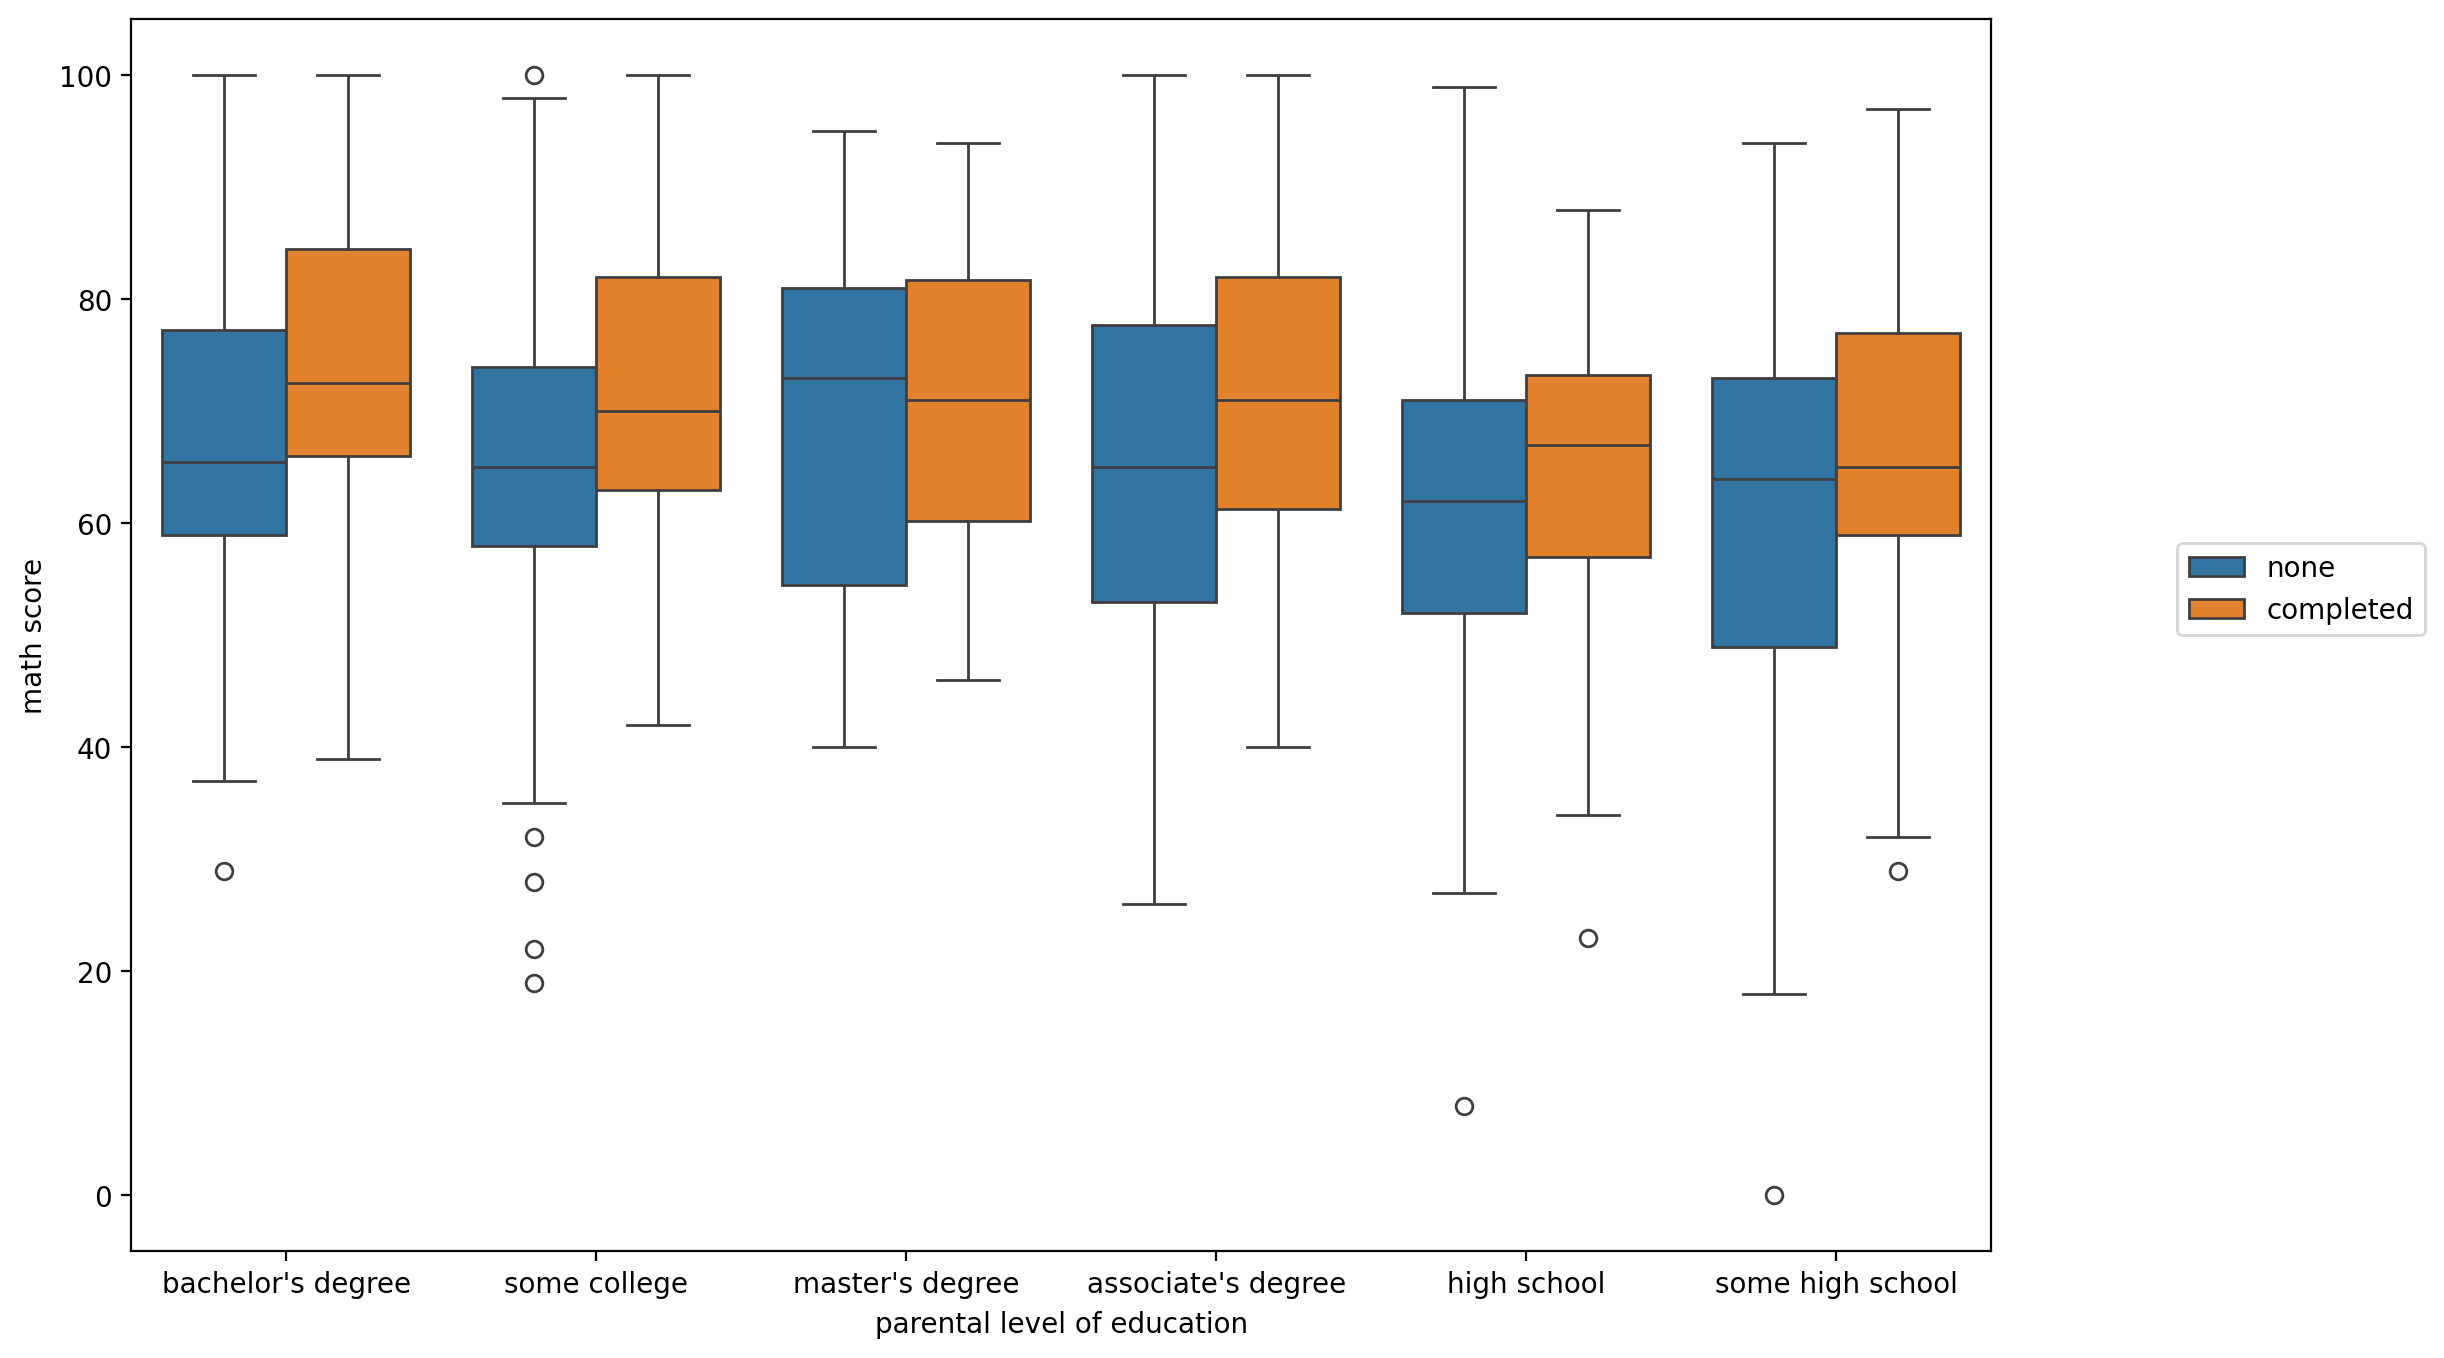

In [37]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, y='math score', x='parental level of education', hue='test preparation course')
plt.legend(loc=(1.1, 0.5))
plt.show()

### Как сделать такой график горизонтальным
Необходимо поменять значения x и y местами

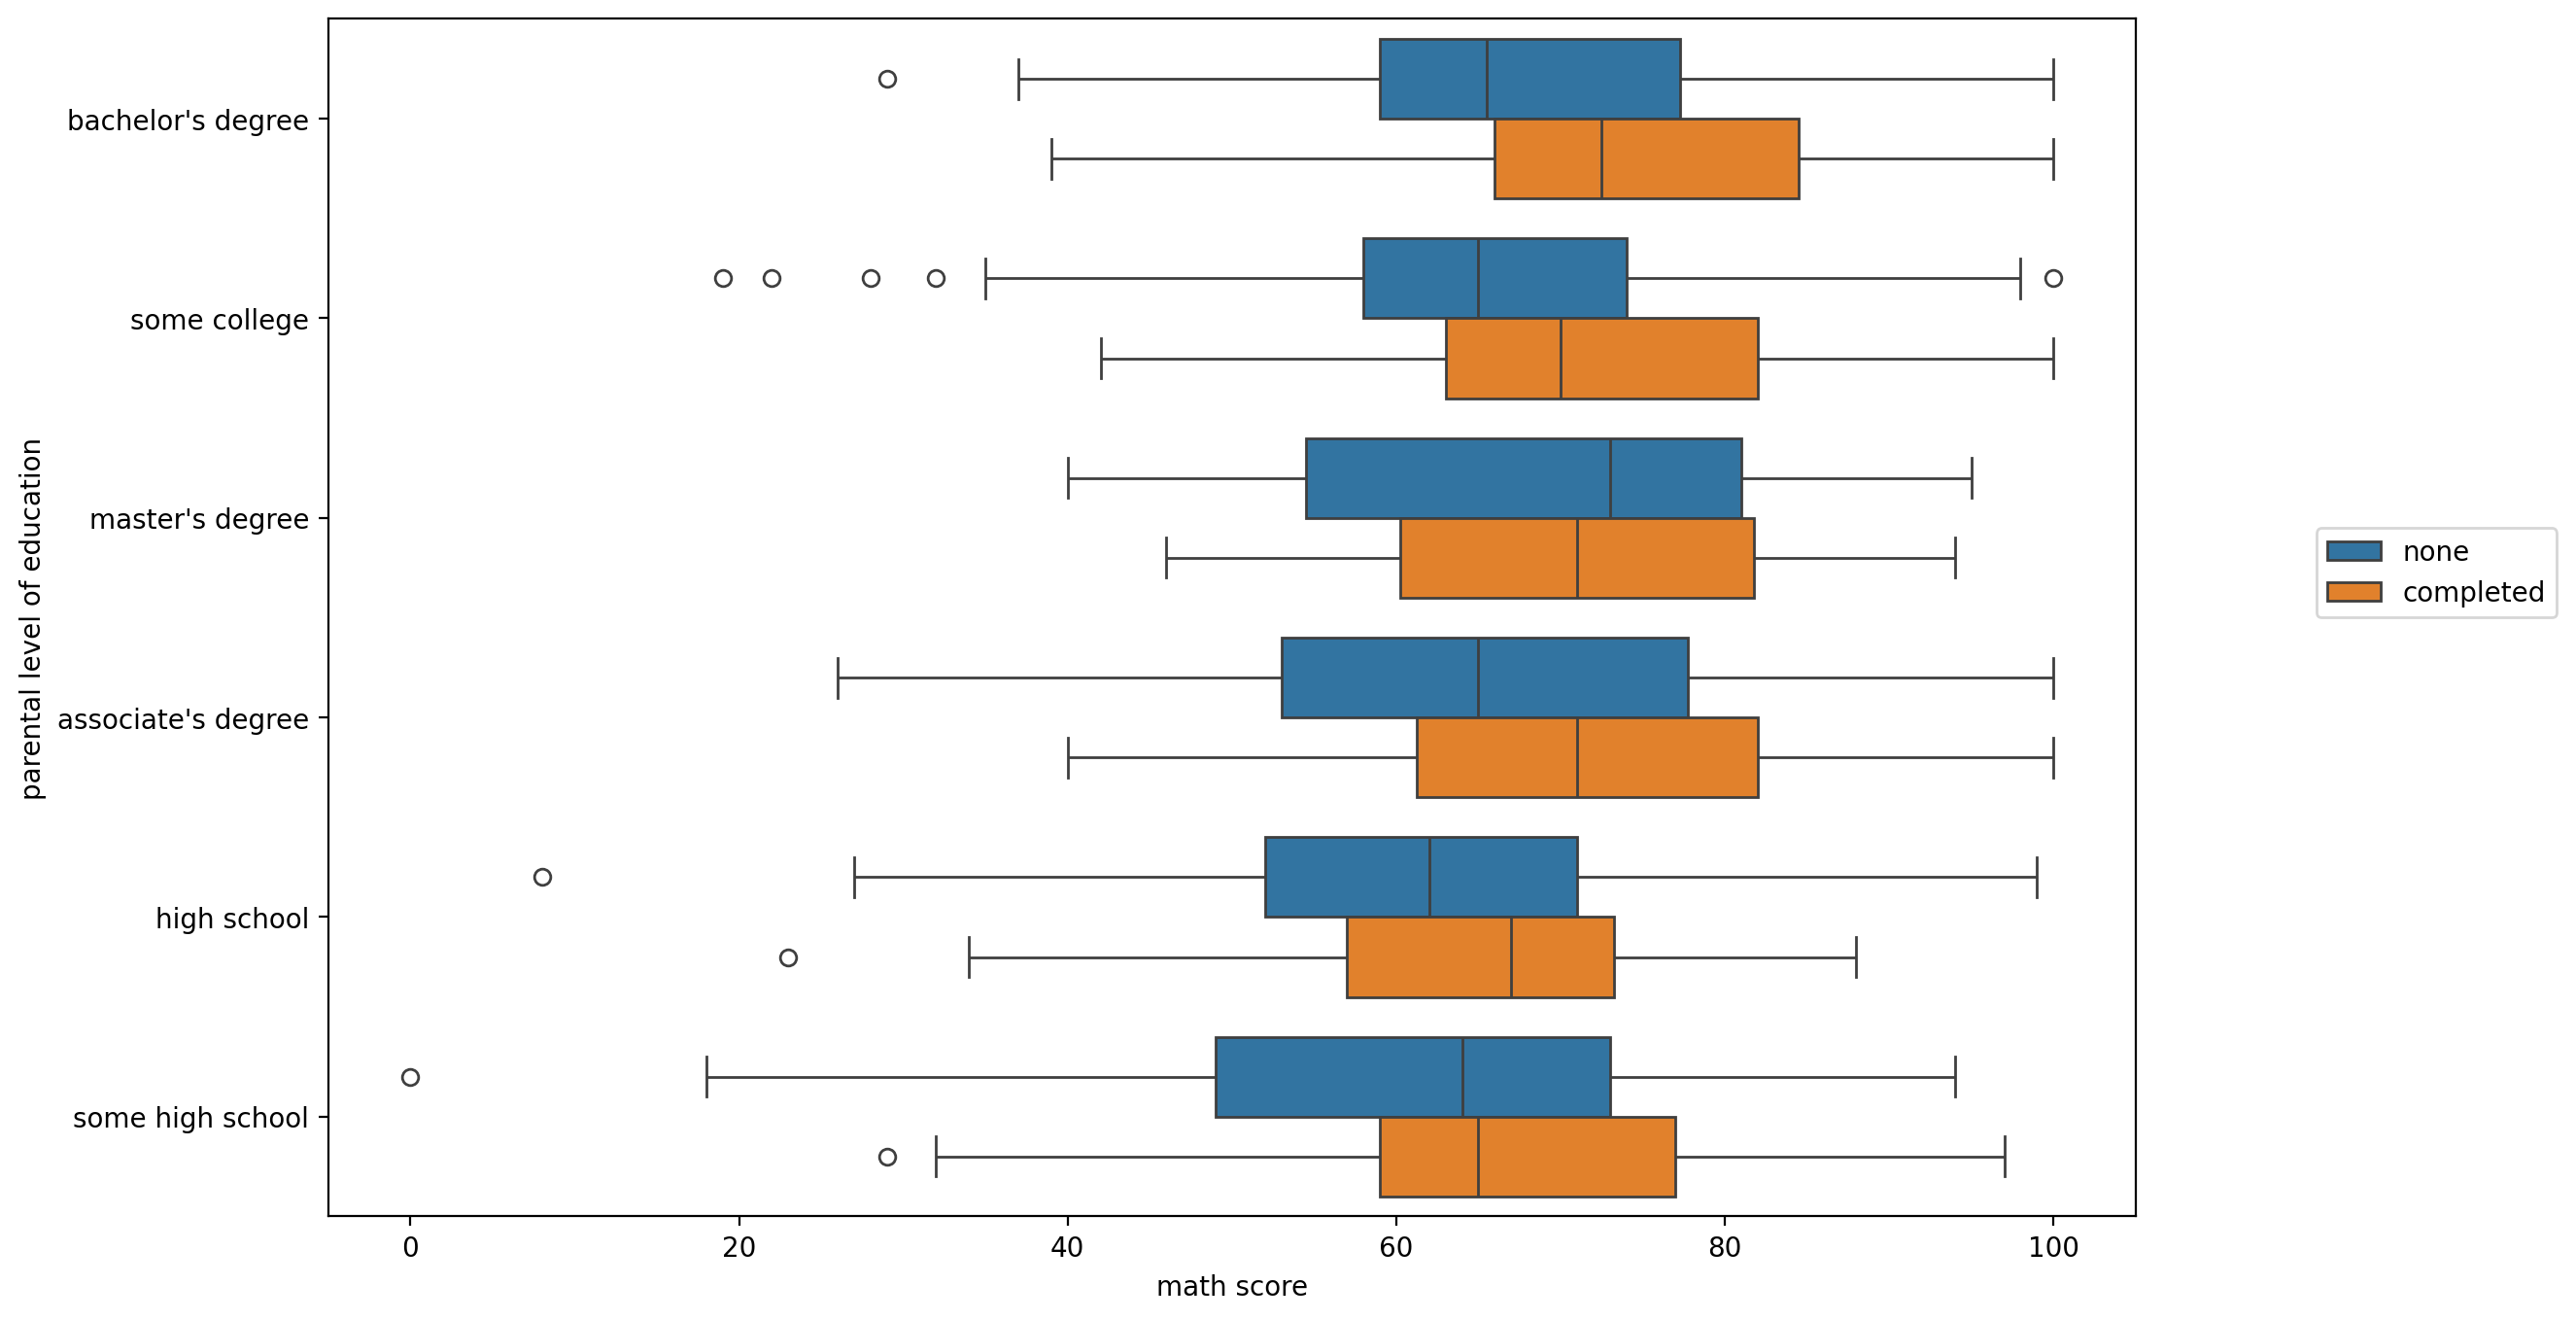

In [42]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, x='math score', y='parental level of education', hue='test preparation course')
plt.legend(loc=(1.1, 0.5))
plt.show()

### Ширина - Width

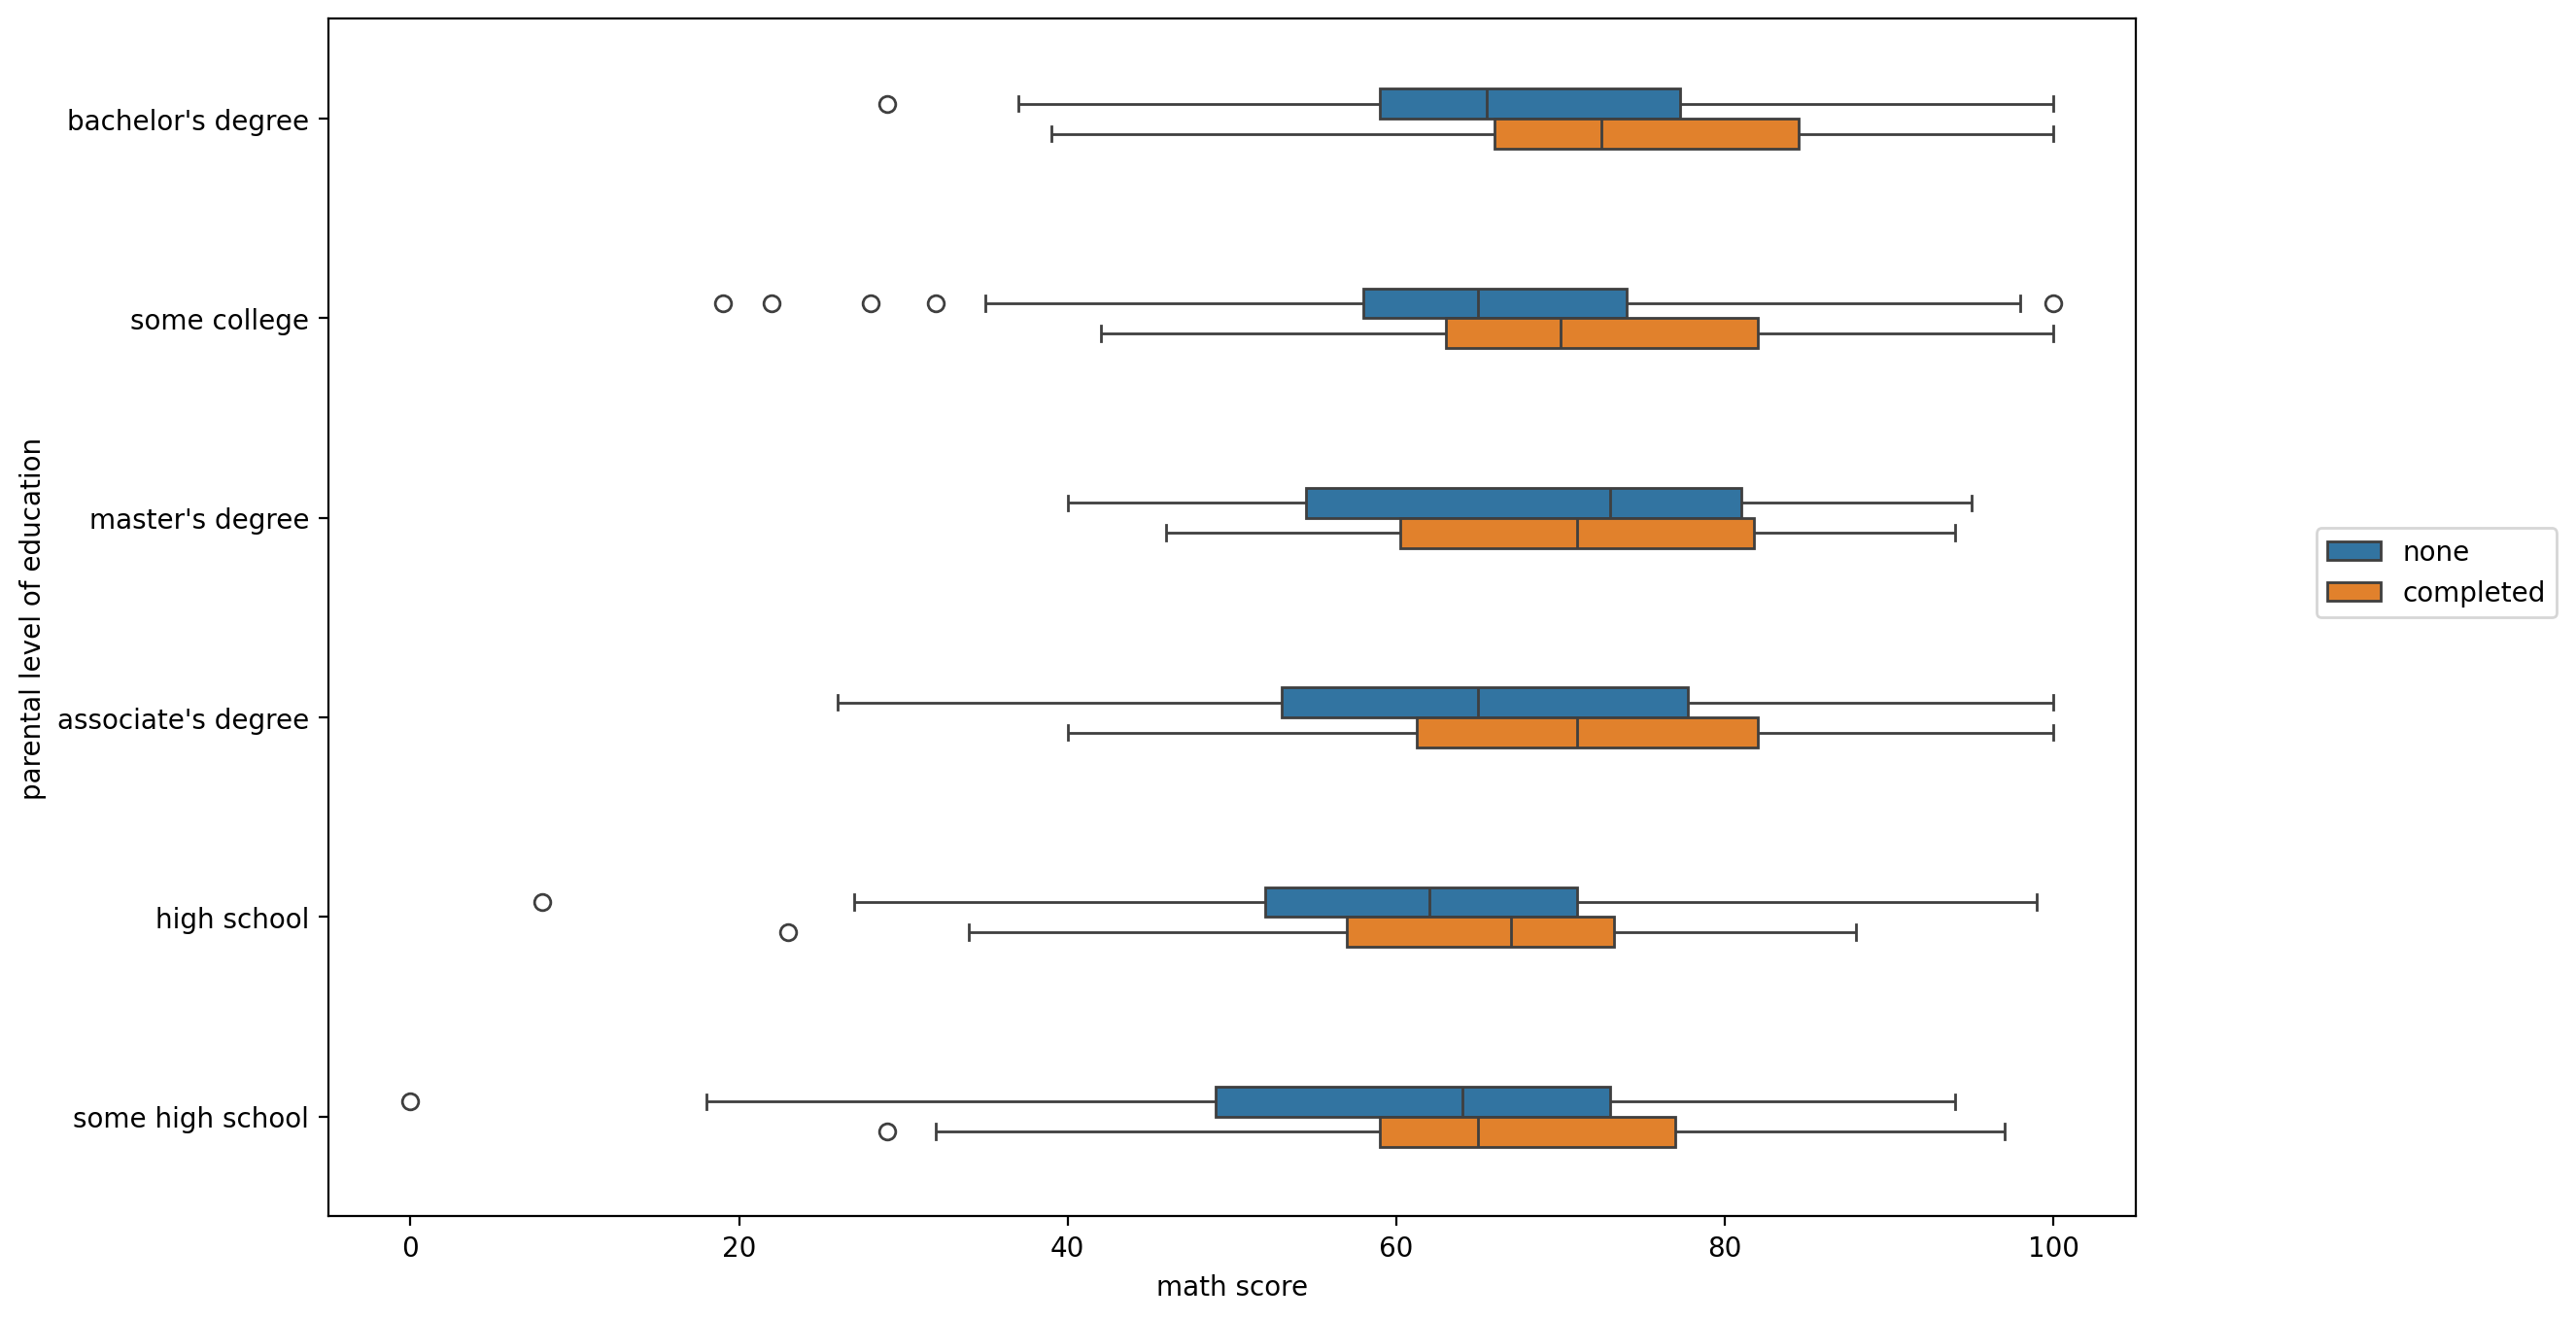

In [51]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, x='math score', y='parental level of education', hue='test preparation course', width=0.3)
plt.legend(loc=(1.1, 0.5))
plt.show()

### Изменение цвета

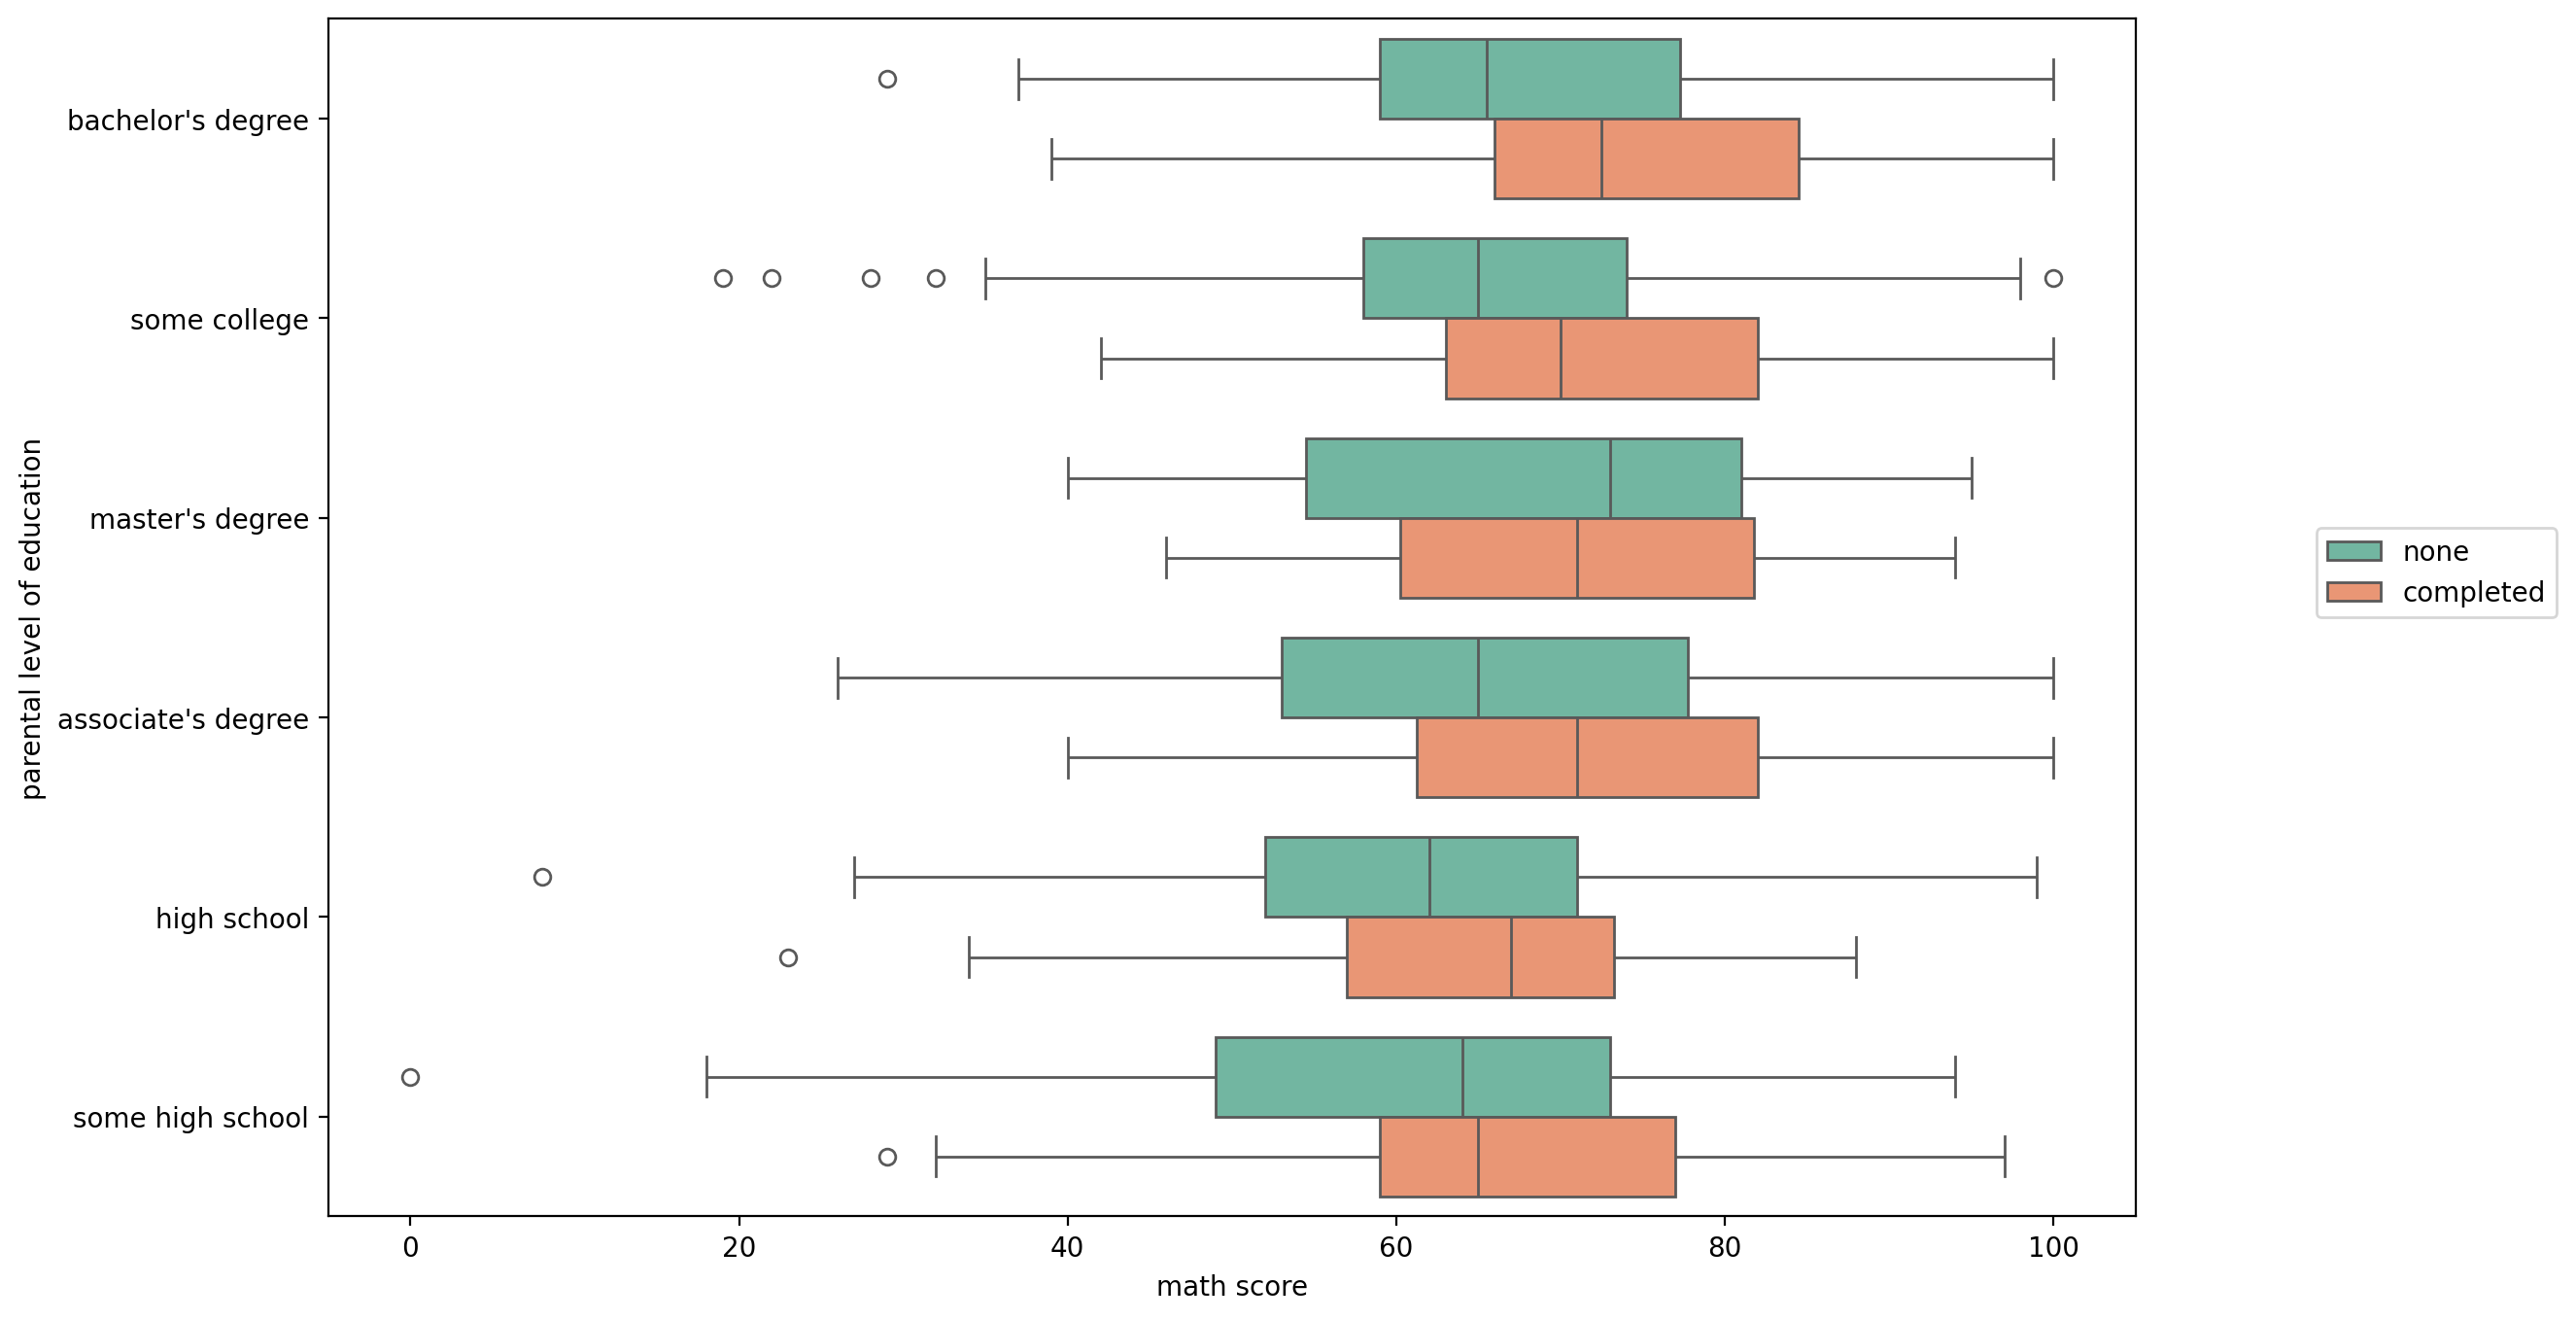

In [54]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, x='math score', y='parental level of education', hue='test preparation course', palette='Set2')
plt.legend(loc=(1.1, 0.5))
plt.show()

---
---

## График Violinplot
Такой график очень похож на Boxplot. Он отображает плотность распределения по данным с помощью KDE. Его ещё можно представить себе как график KDE, отражённый в зеркале.

Как выглядит график KDE с распределением вероятностей для одной переменной:

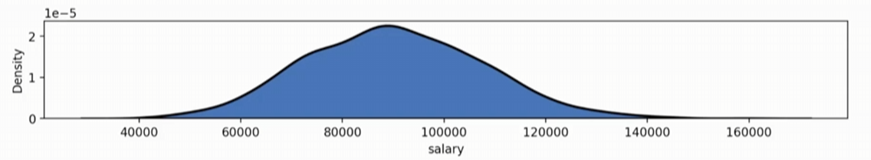

Как выглядит график Violinplot:

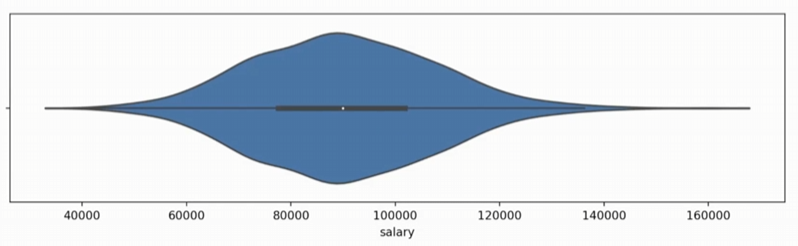

Внутри такого графика может располагаться  миниатюрный Boxplot. Белая точка в центре - это медиана, диапазон отложенный по горизонтальной оси - это интерквартильный размах.

Эти графики можно также построить отдельно для каждой из категорий:

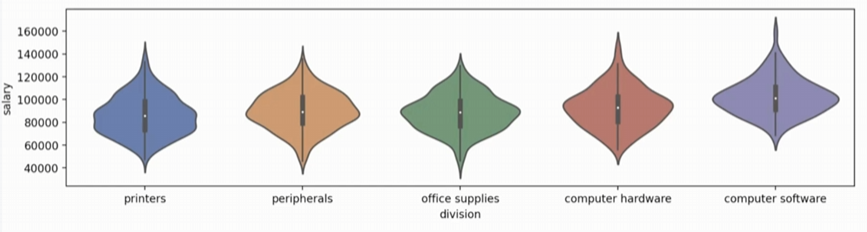

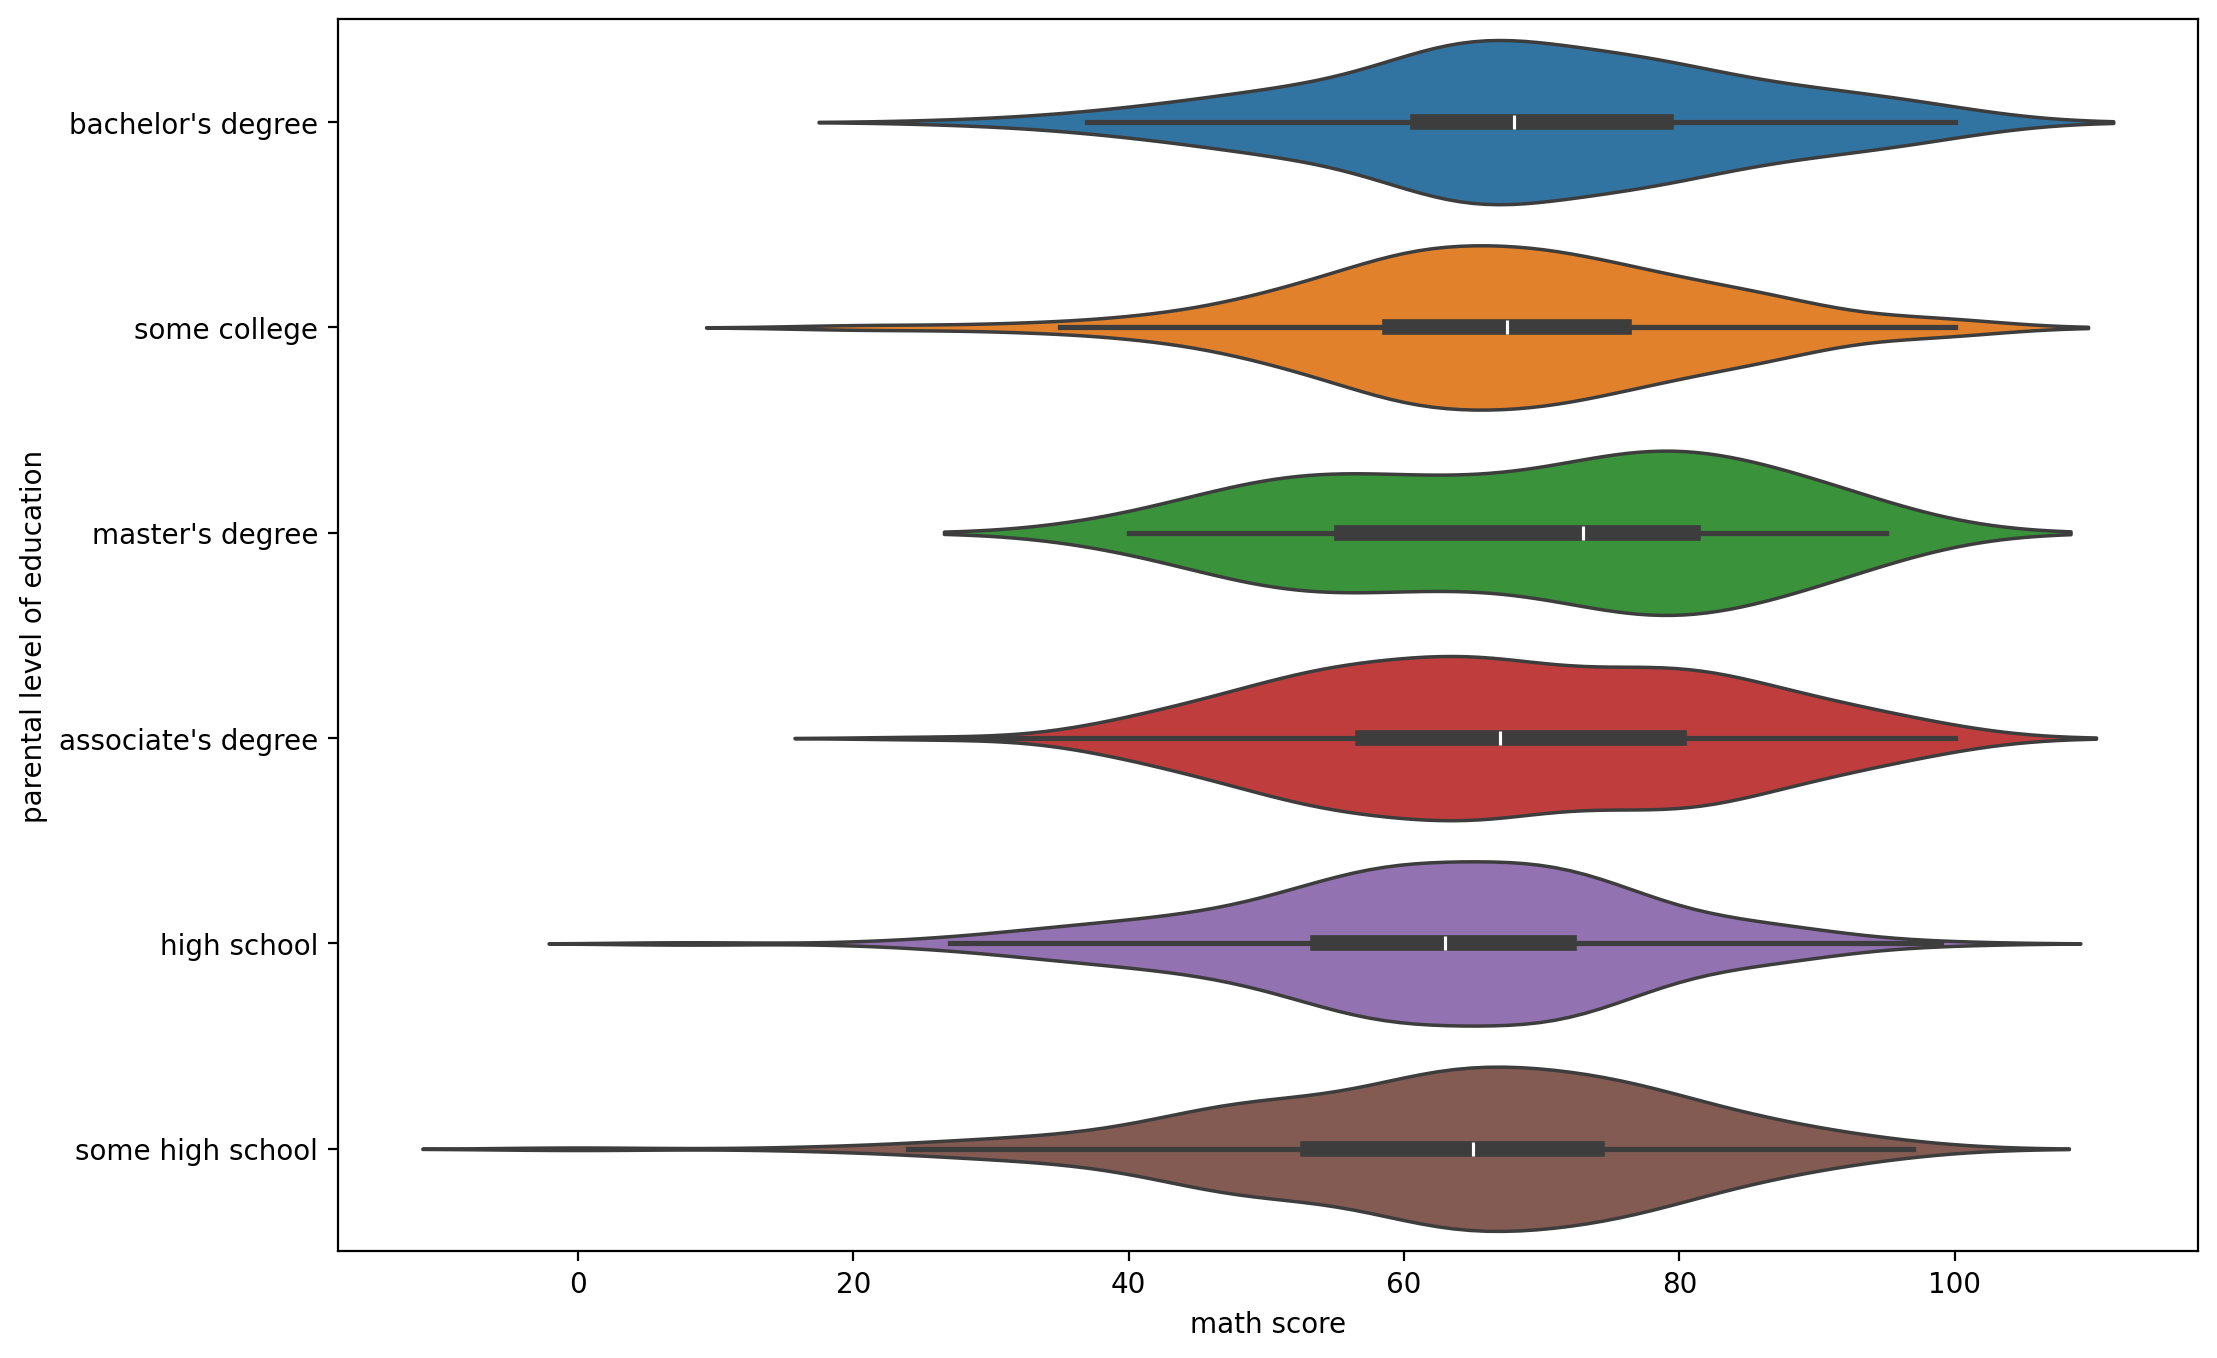

In [64]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='math score', y='parental level of education', hue='parental level of education')
plt.show()

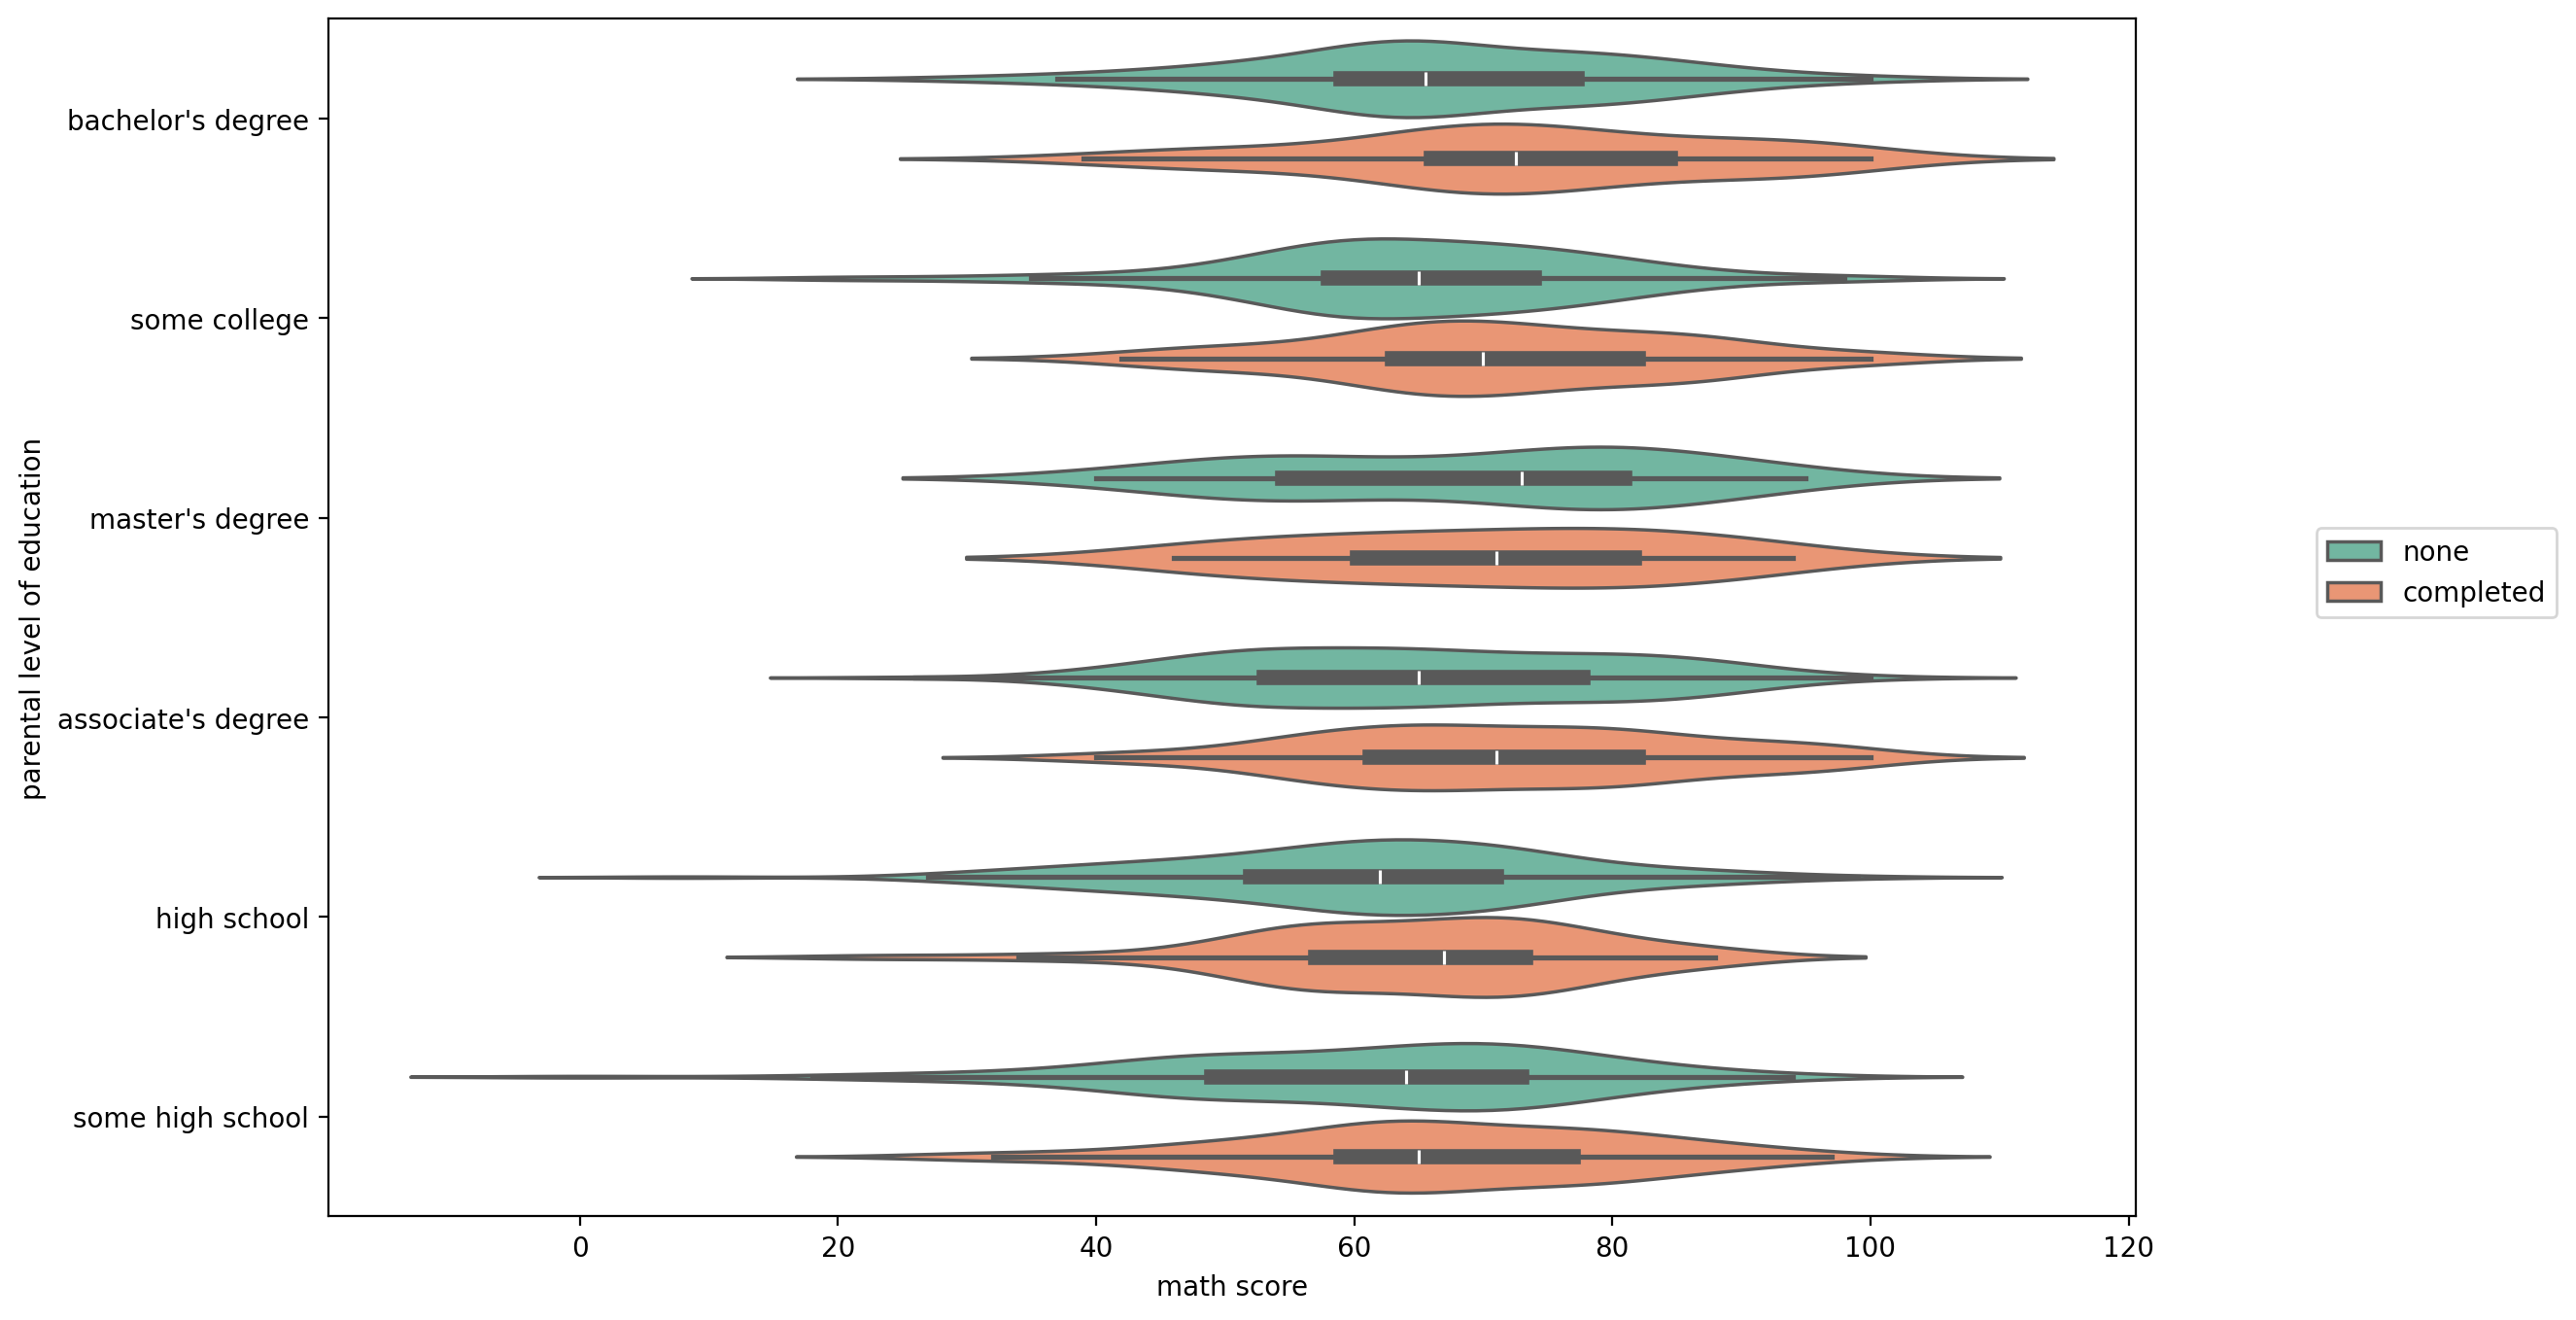

In [68]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='math score', y='parental level of education', hue='test preparation course', palette='Set2')
plt.legend(loc=(1.1, 0.5))
plt.show()

### Параметры Violinplot
#### Параметр split  
Если мы в качестве hue указываем переменную, которая принимает только два значения, то можно с помощью split=True нарисовать половинки графика для каждого из этих двух значений. Так можно легче сравнивать распределения.

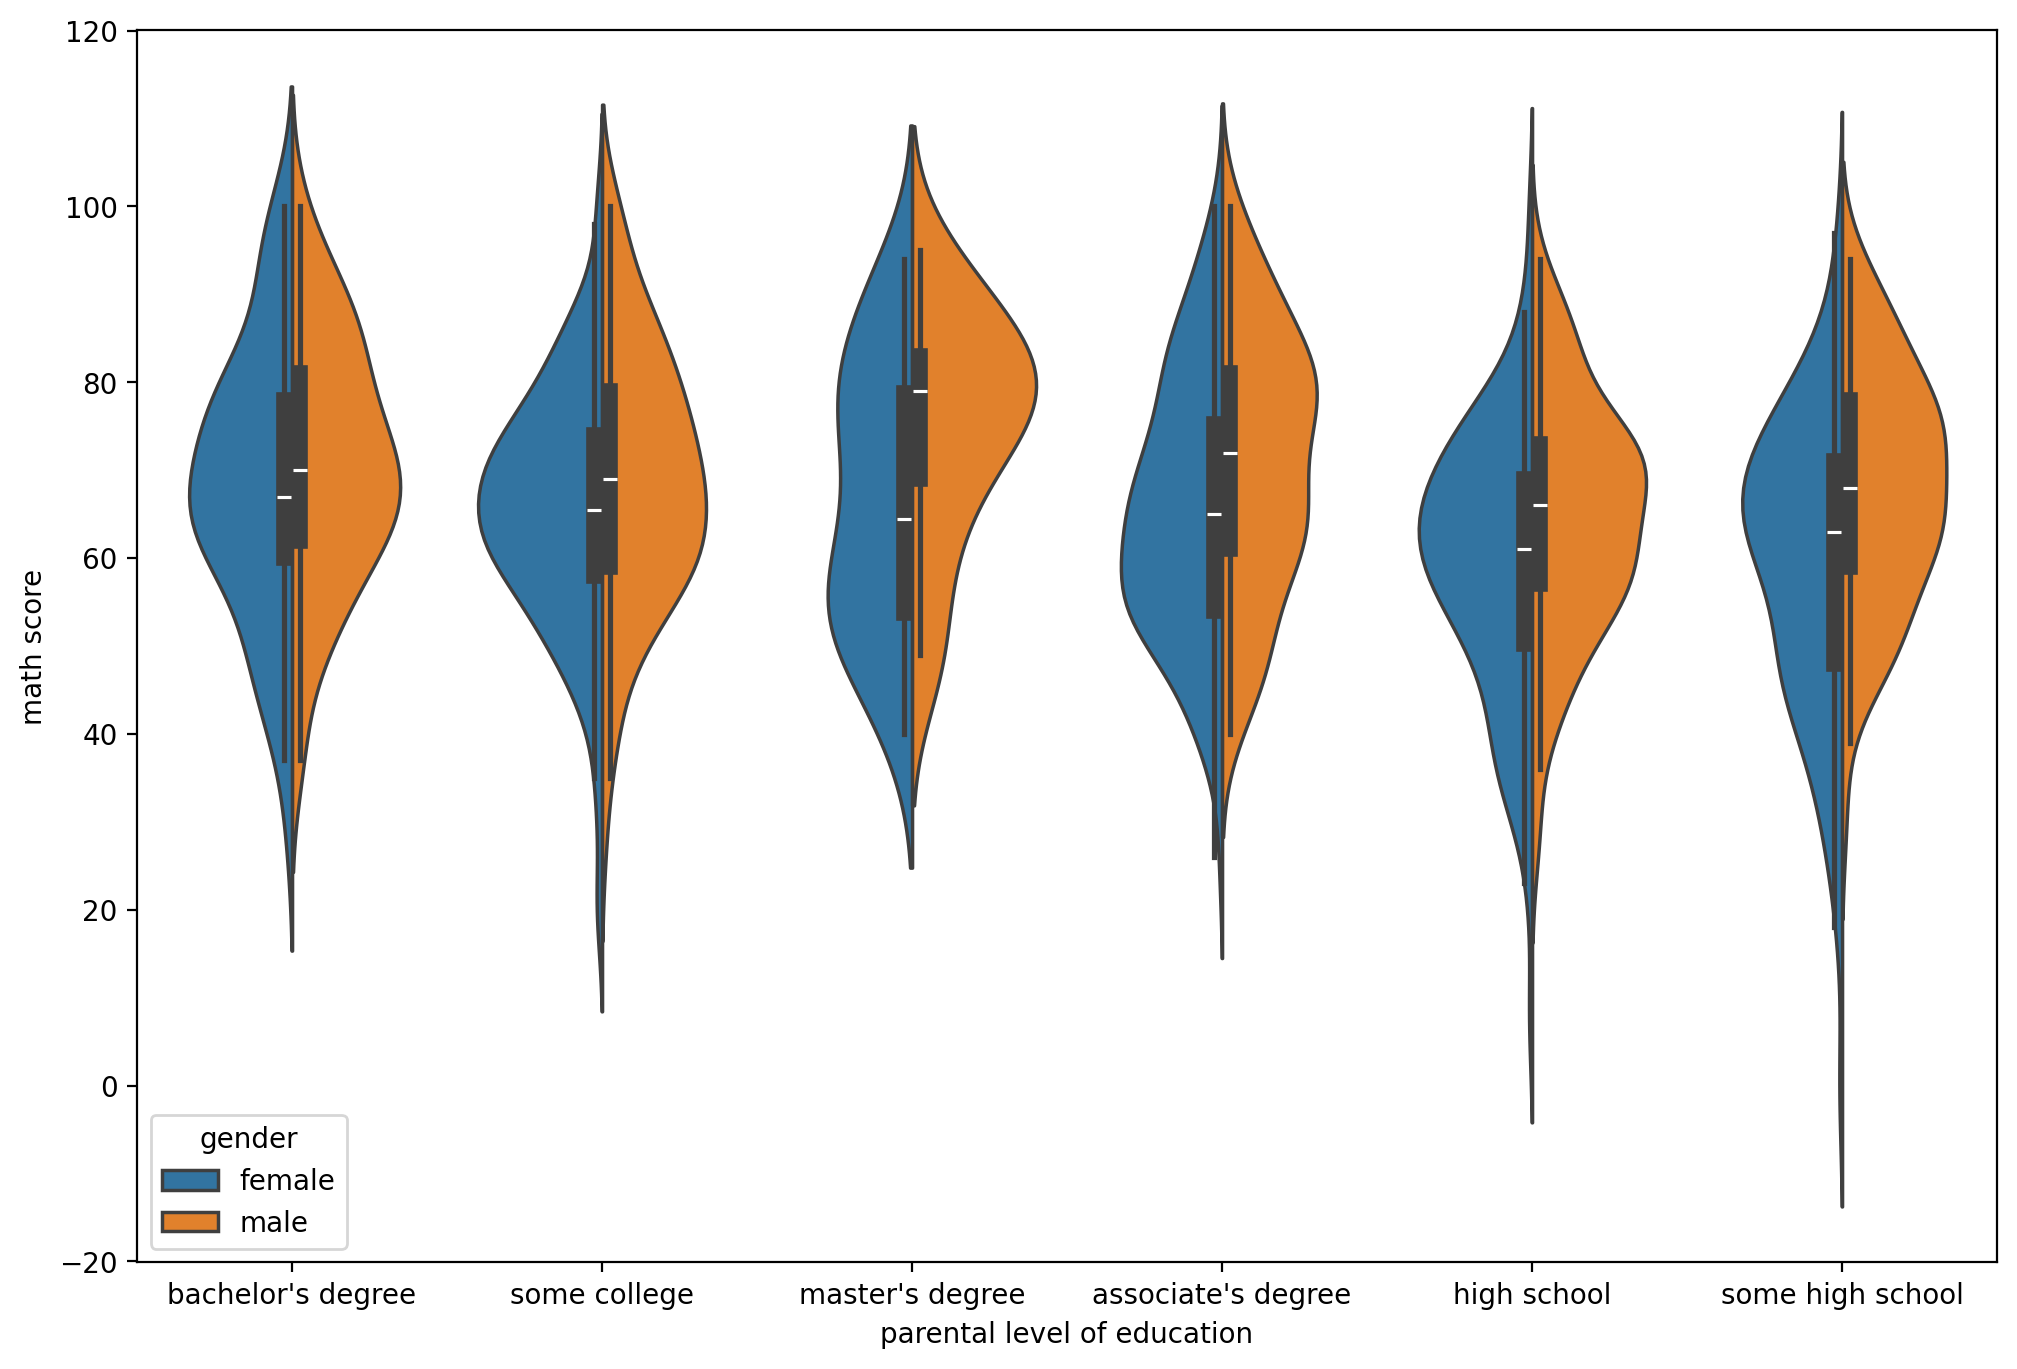

In [75]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='parental level of education', y='math score', hue='gender', split=True)
plt.show()

#### Параметр inner
Позволяет по-разному изображать точки внутри фигуры.
* box - рисует миниатюрный boxplot
* quartiles - рисует квартили распределения
* point или stick - рисует каждую отдельную точку
* None - не рисует внутреннюю часть

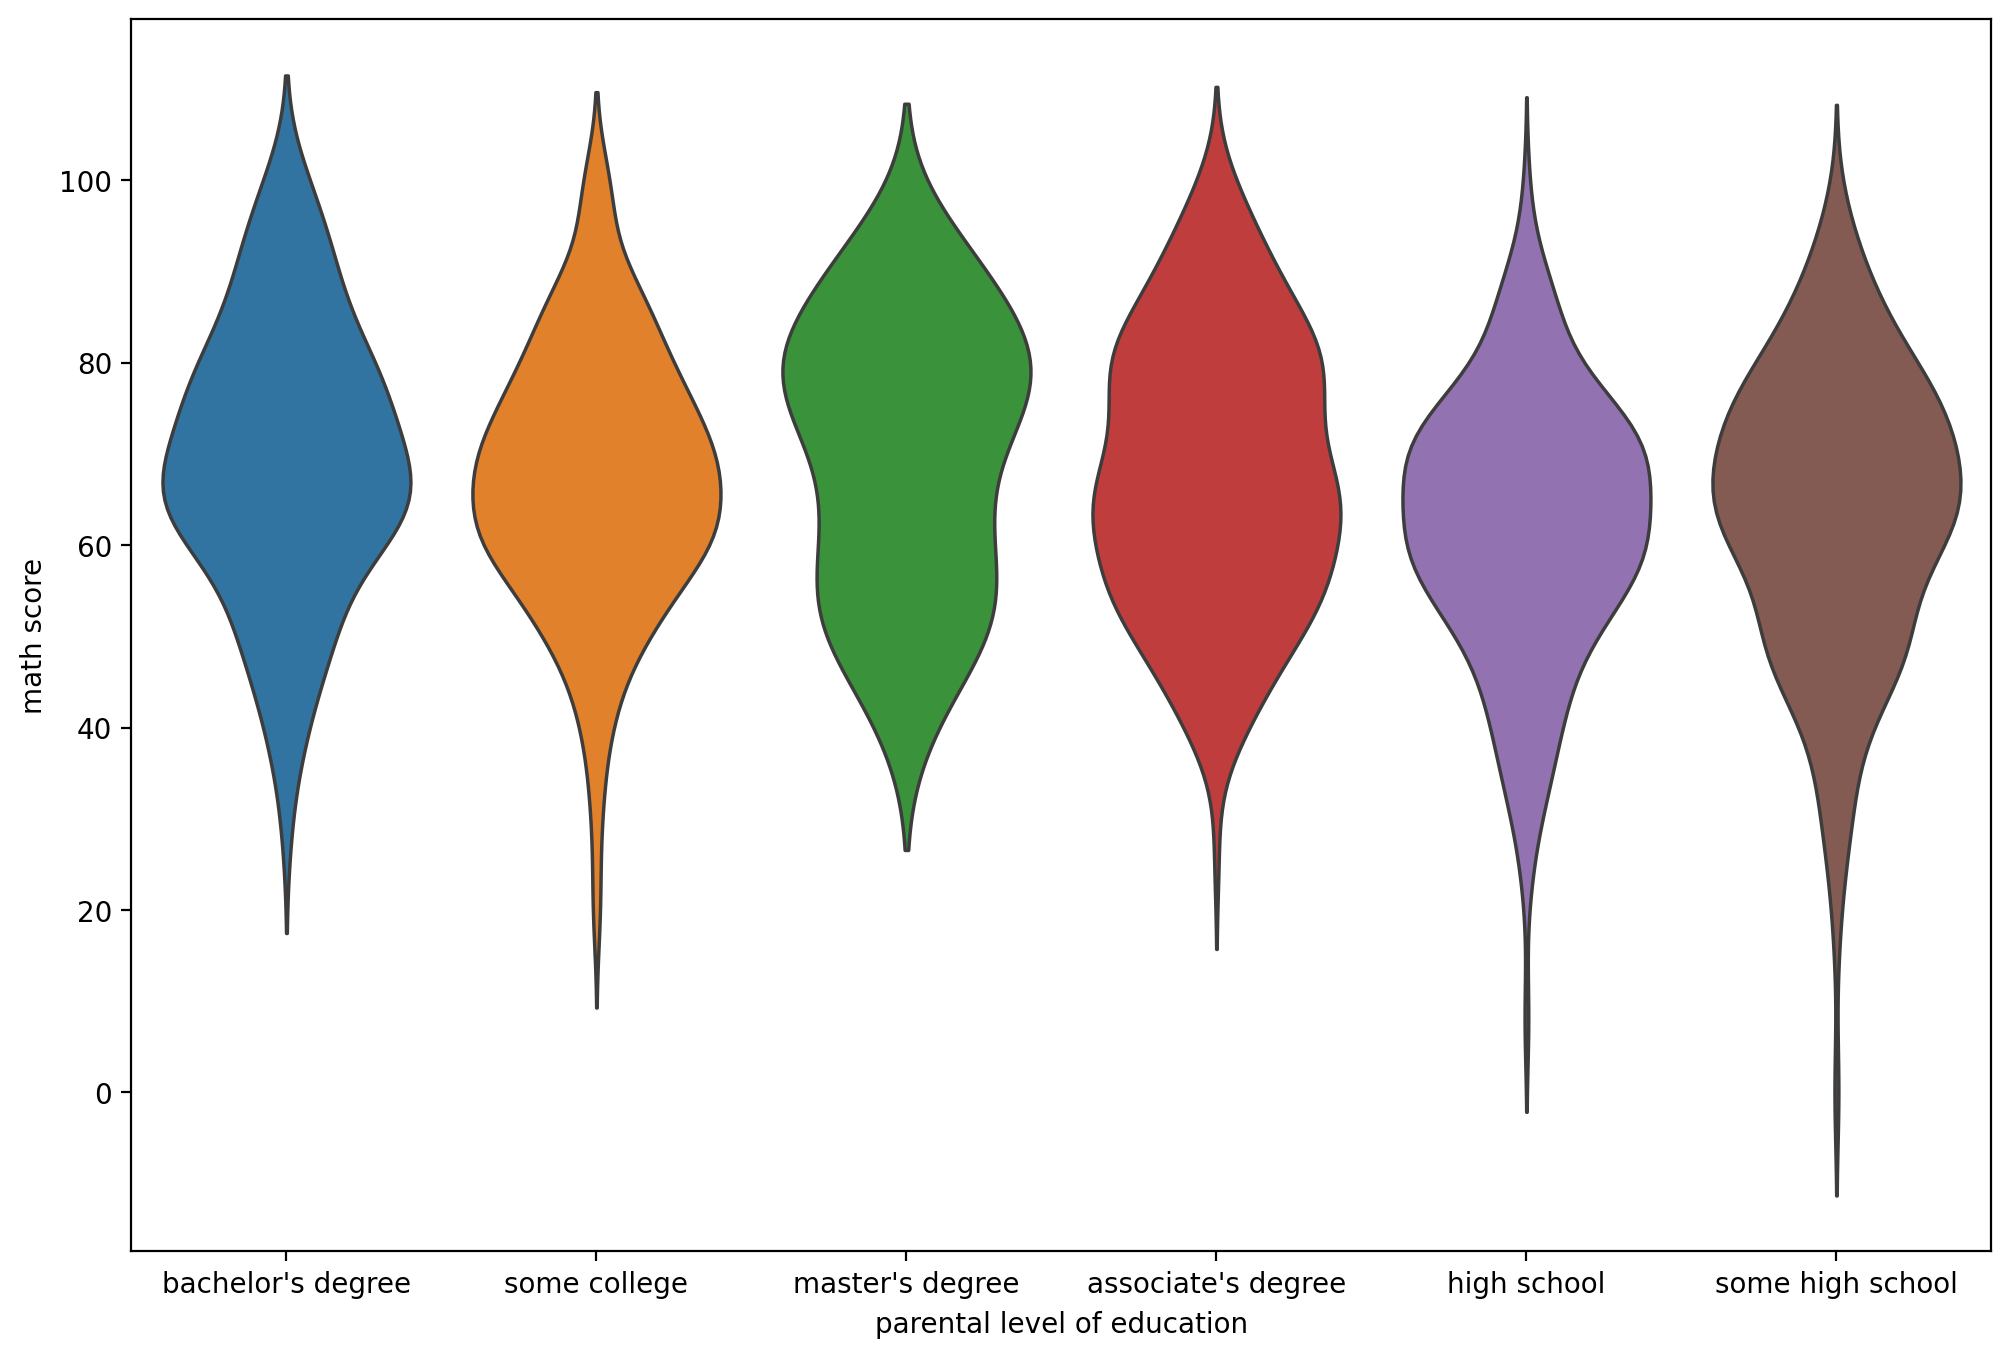

In [79]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='parental level of education', y='math score', hue='parental level of education', inner=None)
plt.show()

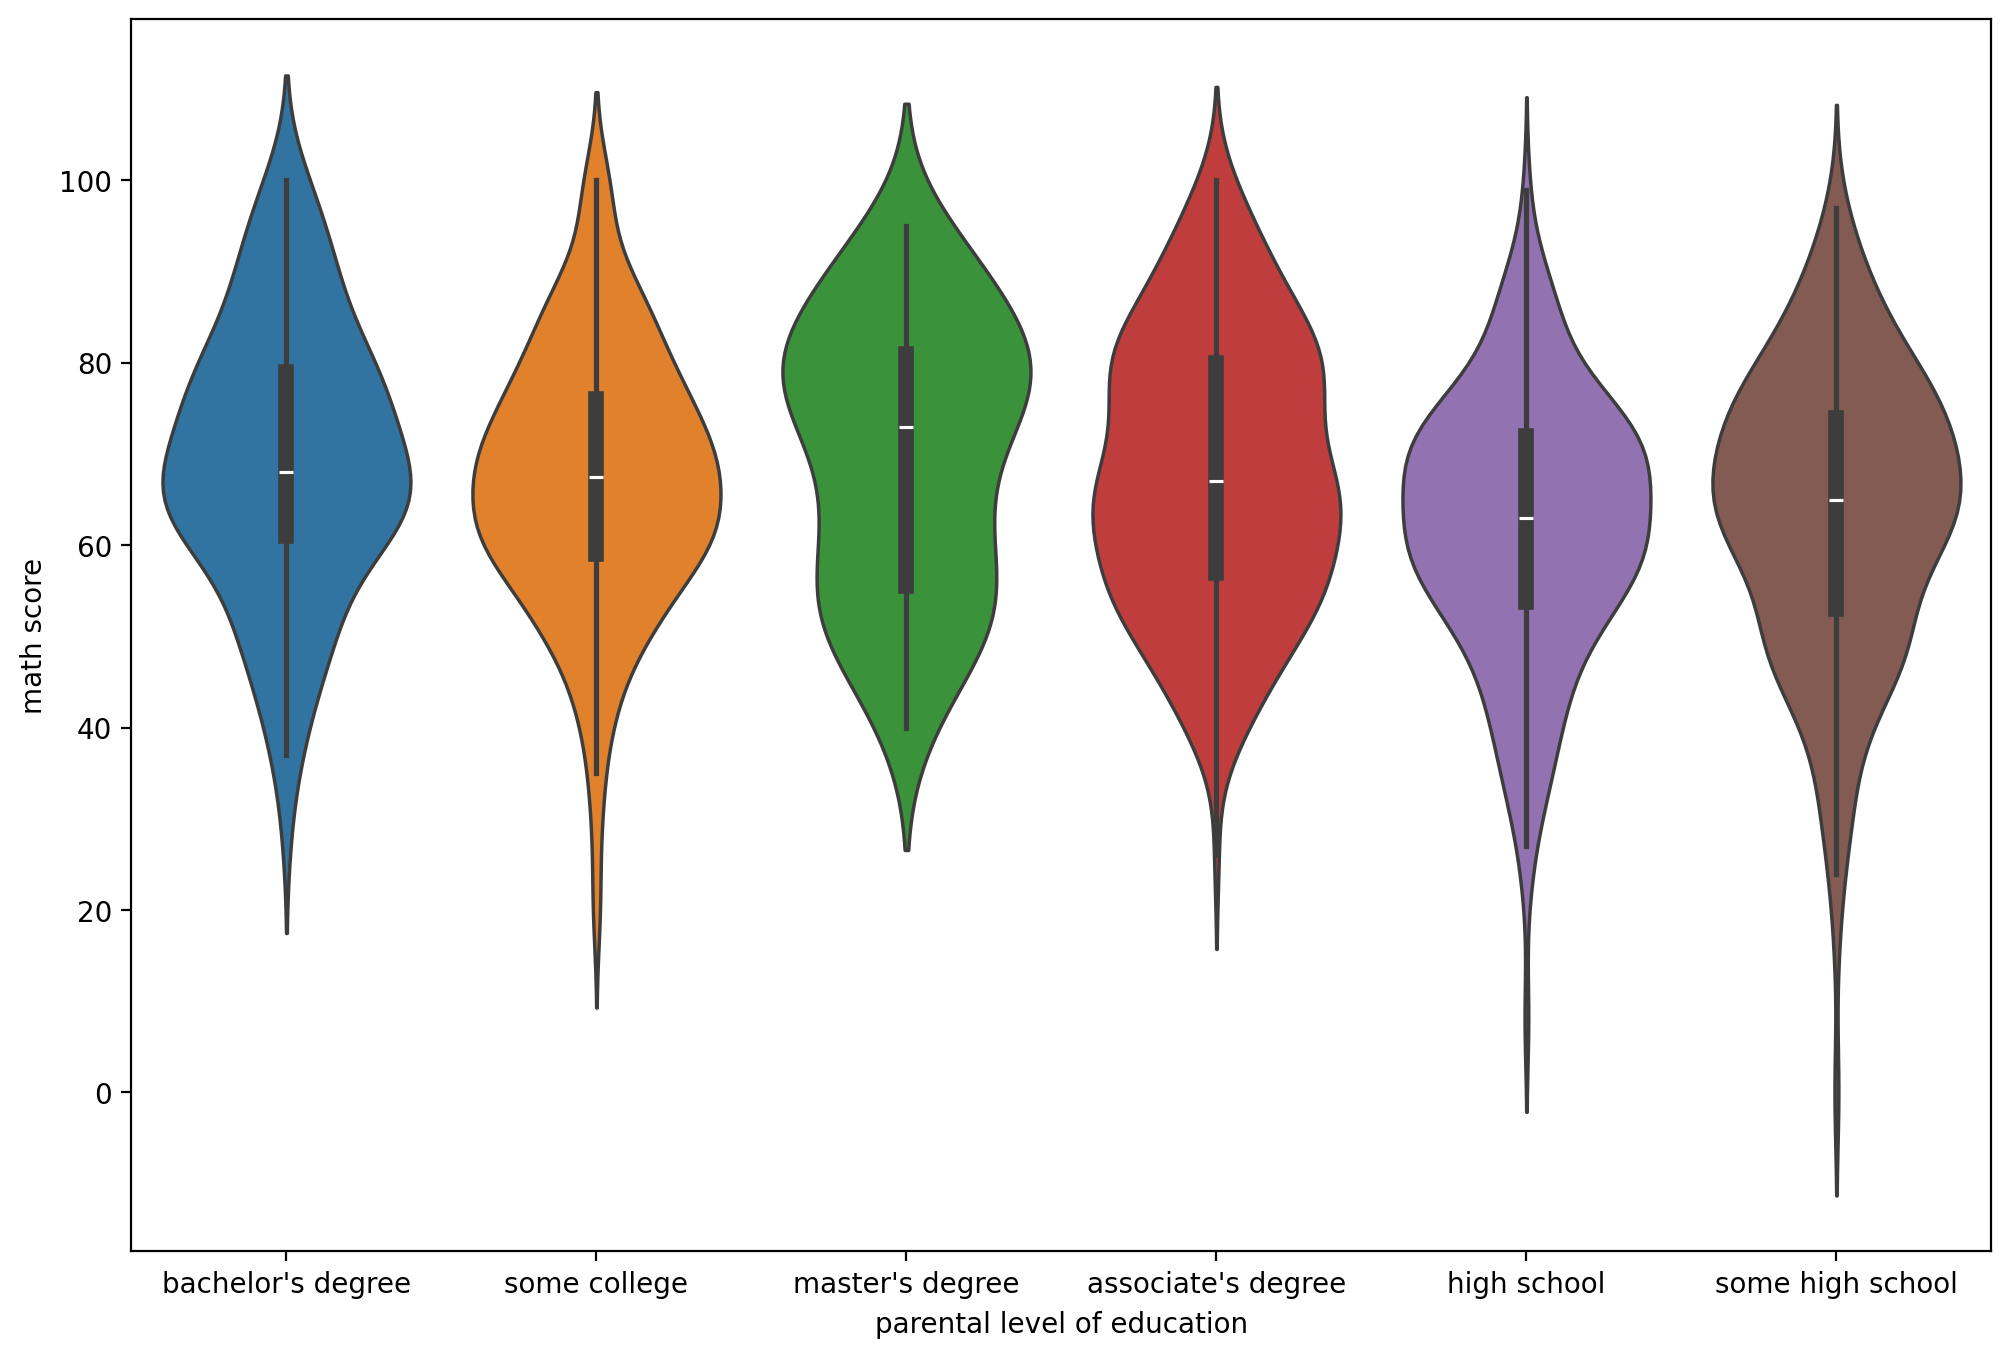

In [83]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='parental level of education', y='math score', hue='parental level of education', inner='box')
plt.show()

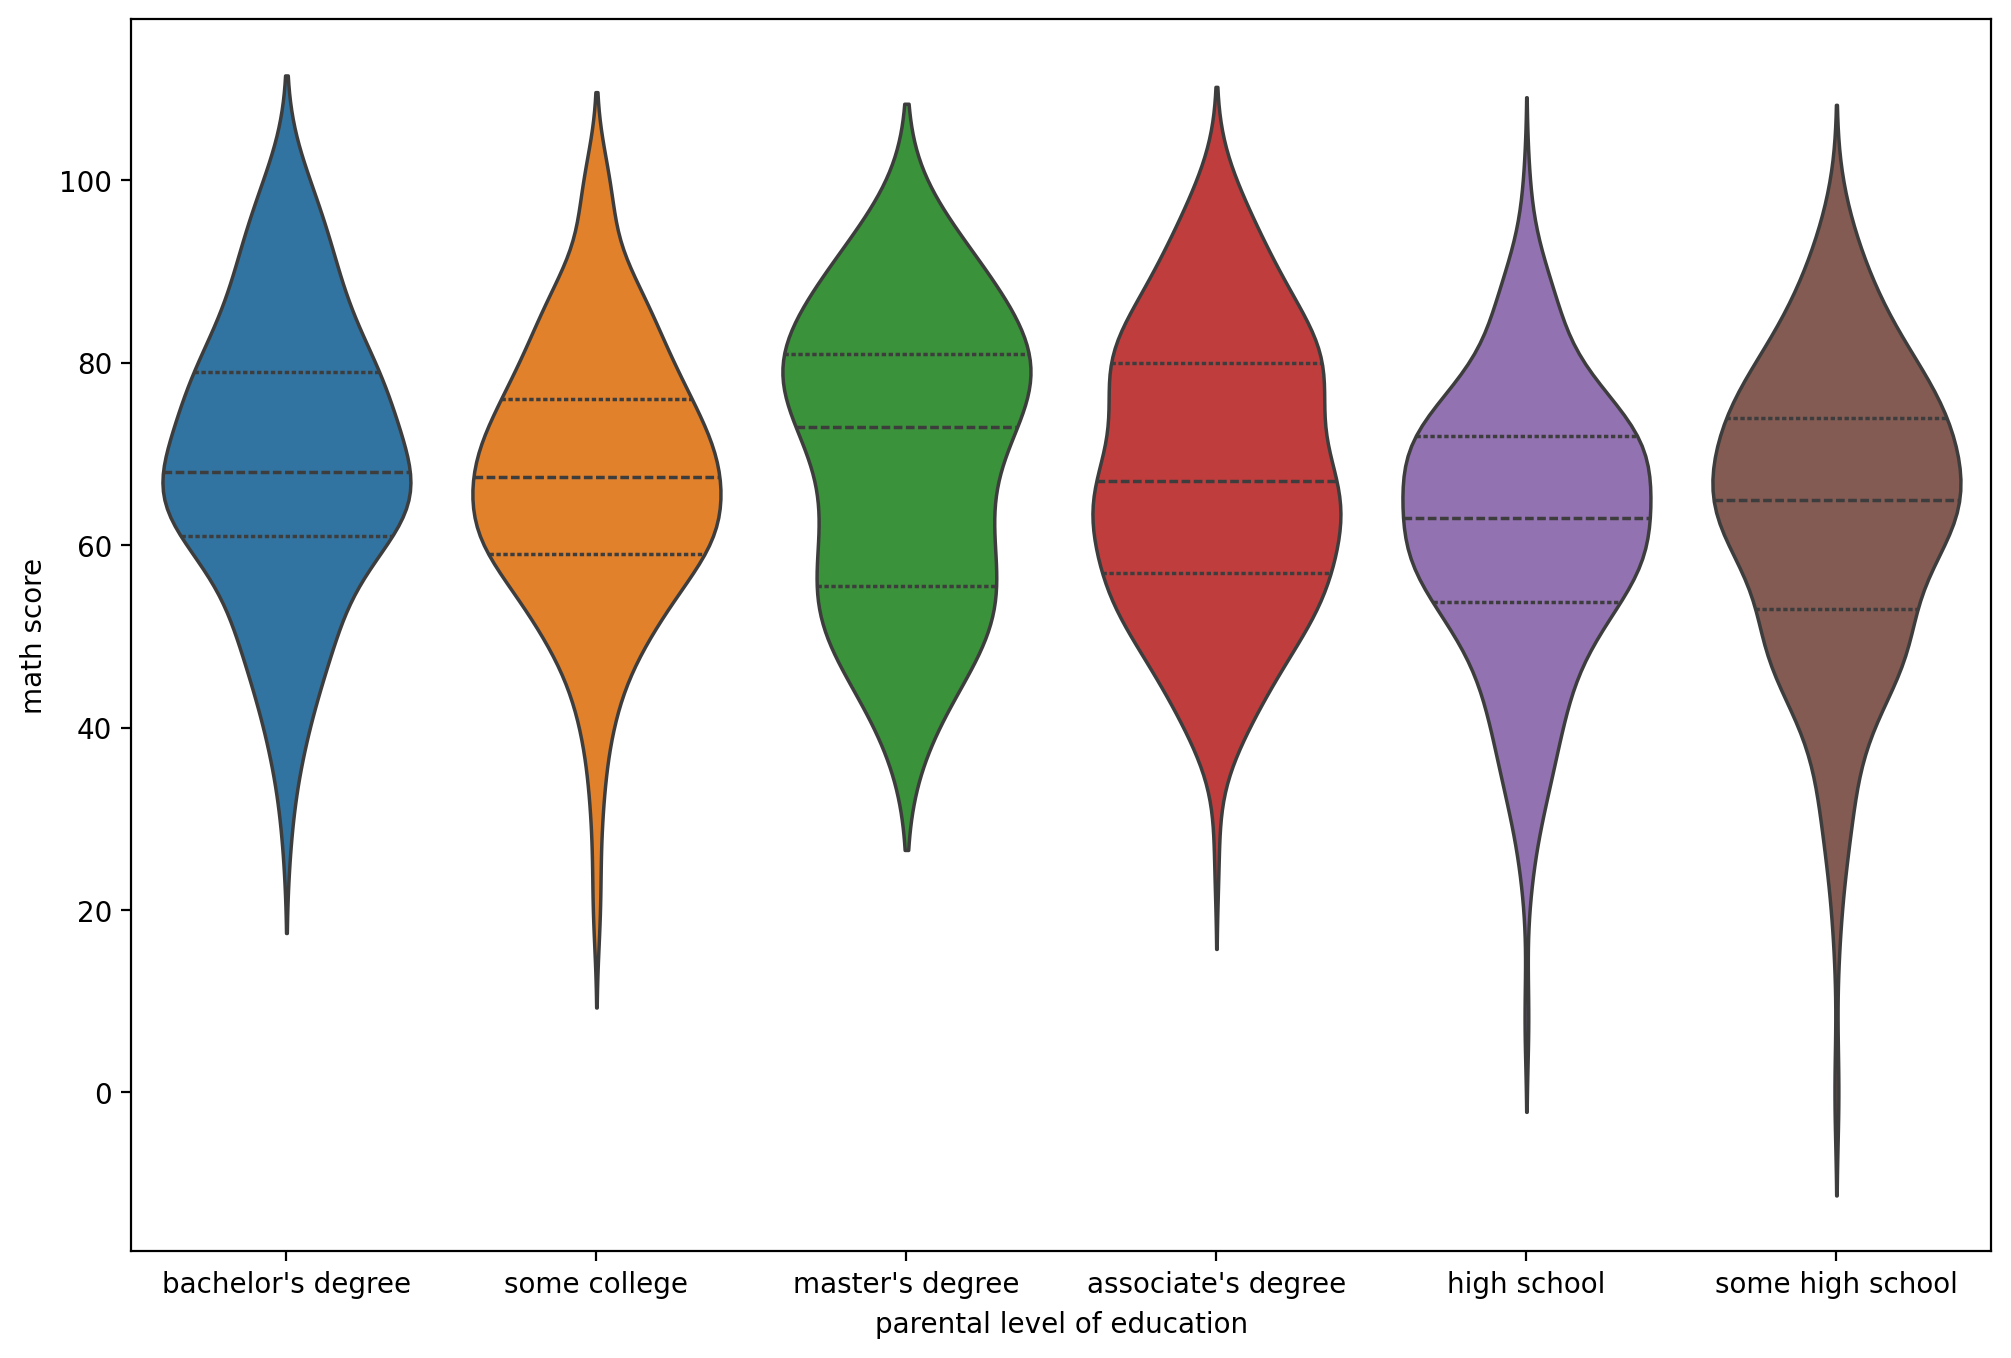

In [85]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='parental level of education', y='math score', hue='parental level of education', inner='quartile')
plt.show()

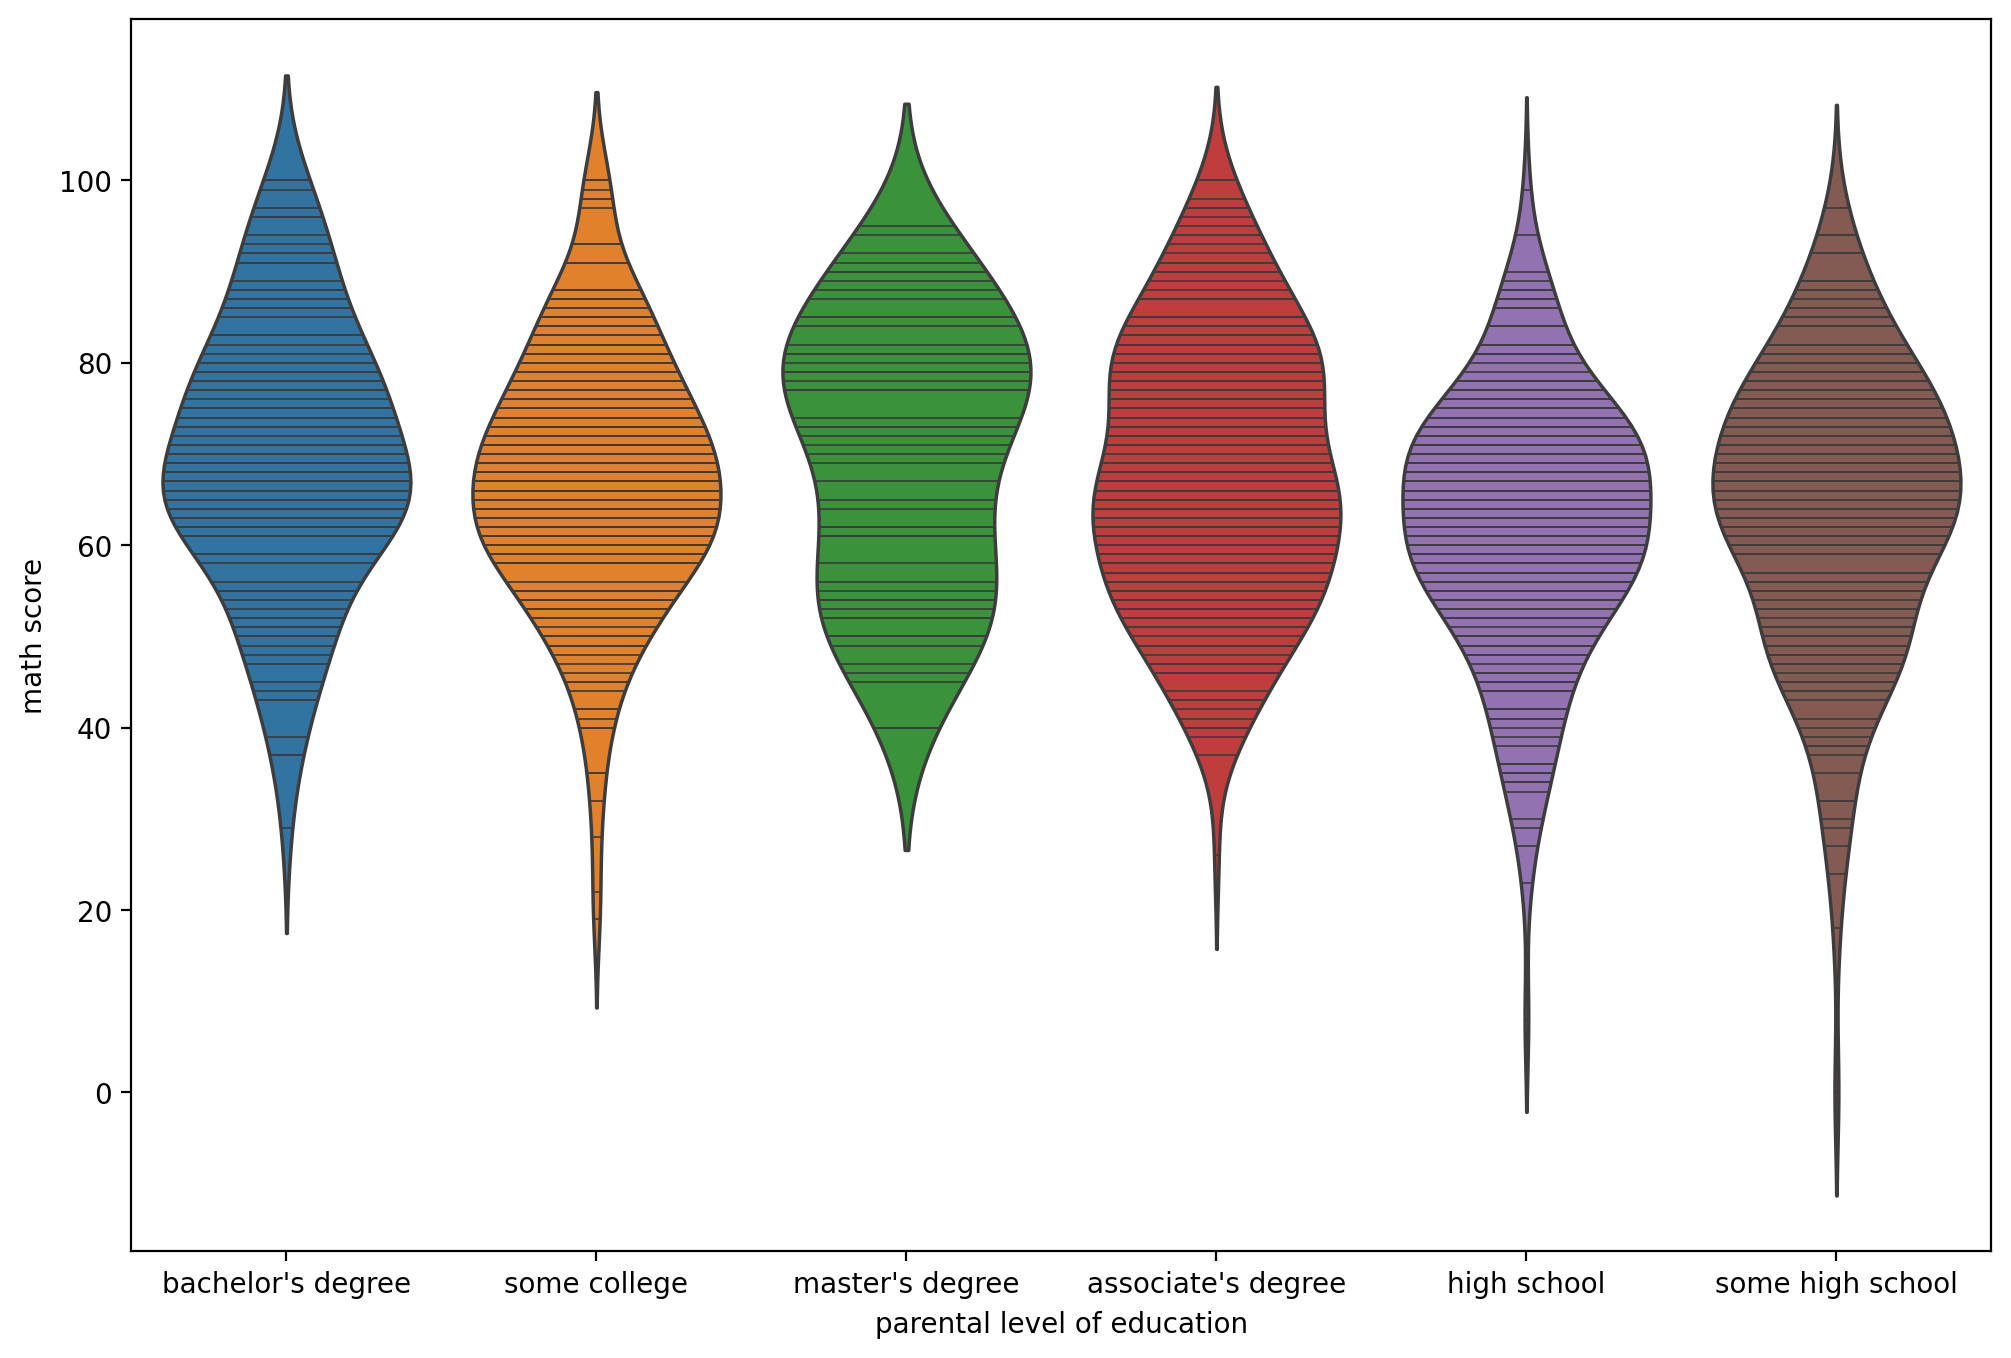

In [91]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='parental level of education',y='math score', hue='parental level of education', inner='stick')
plt.show()

#### Параметр bandwidth (bw)
Аналогичен параметру bandwidth для kdeplot

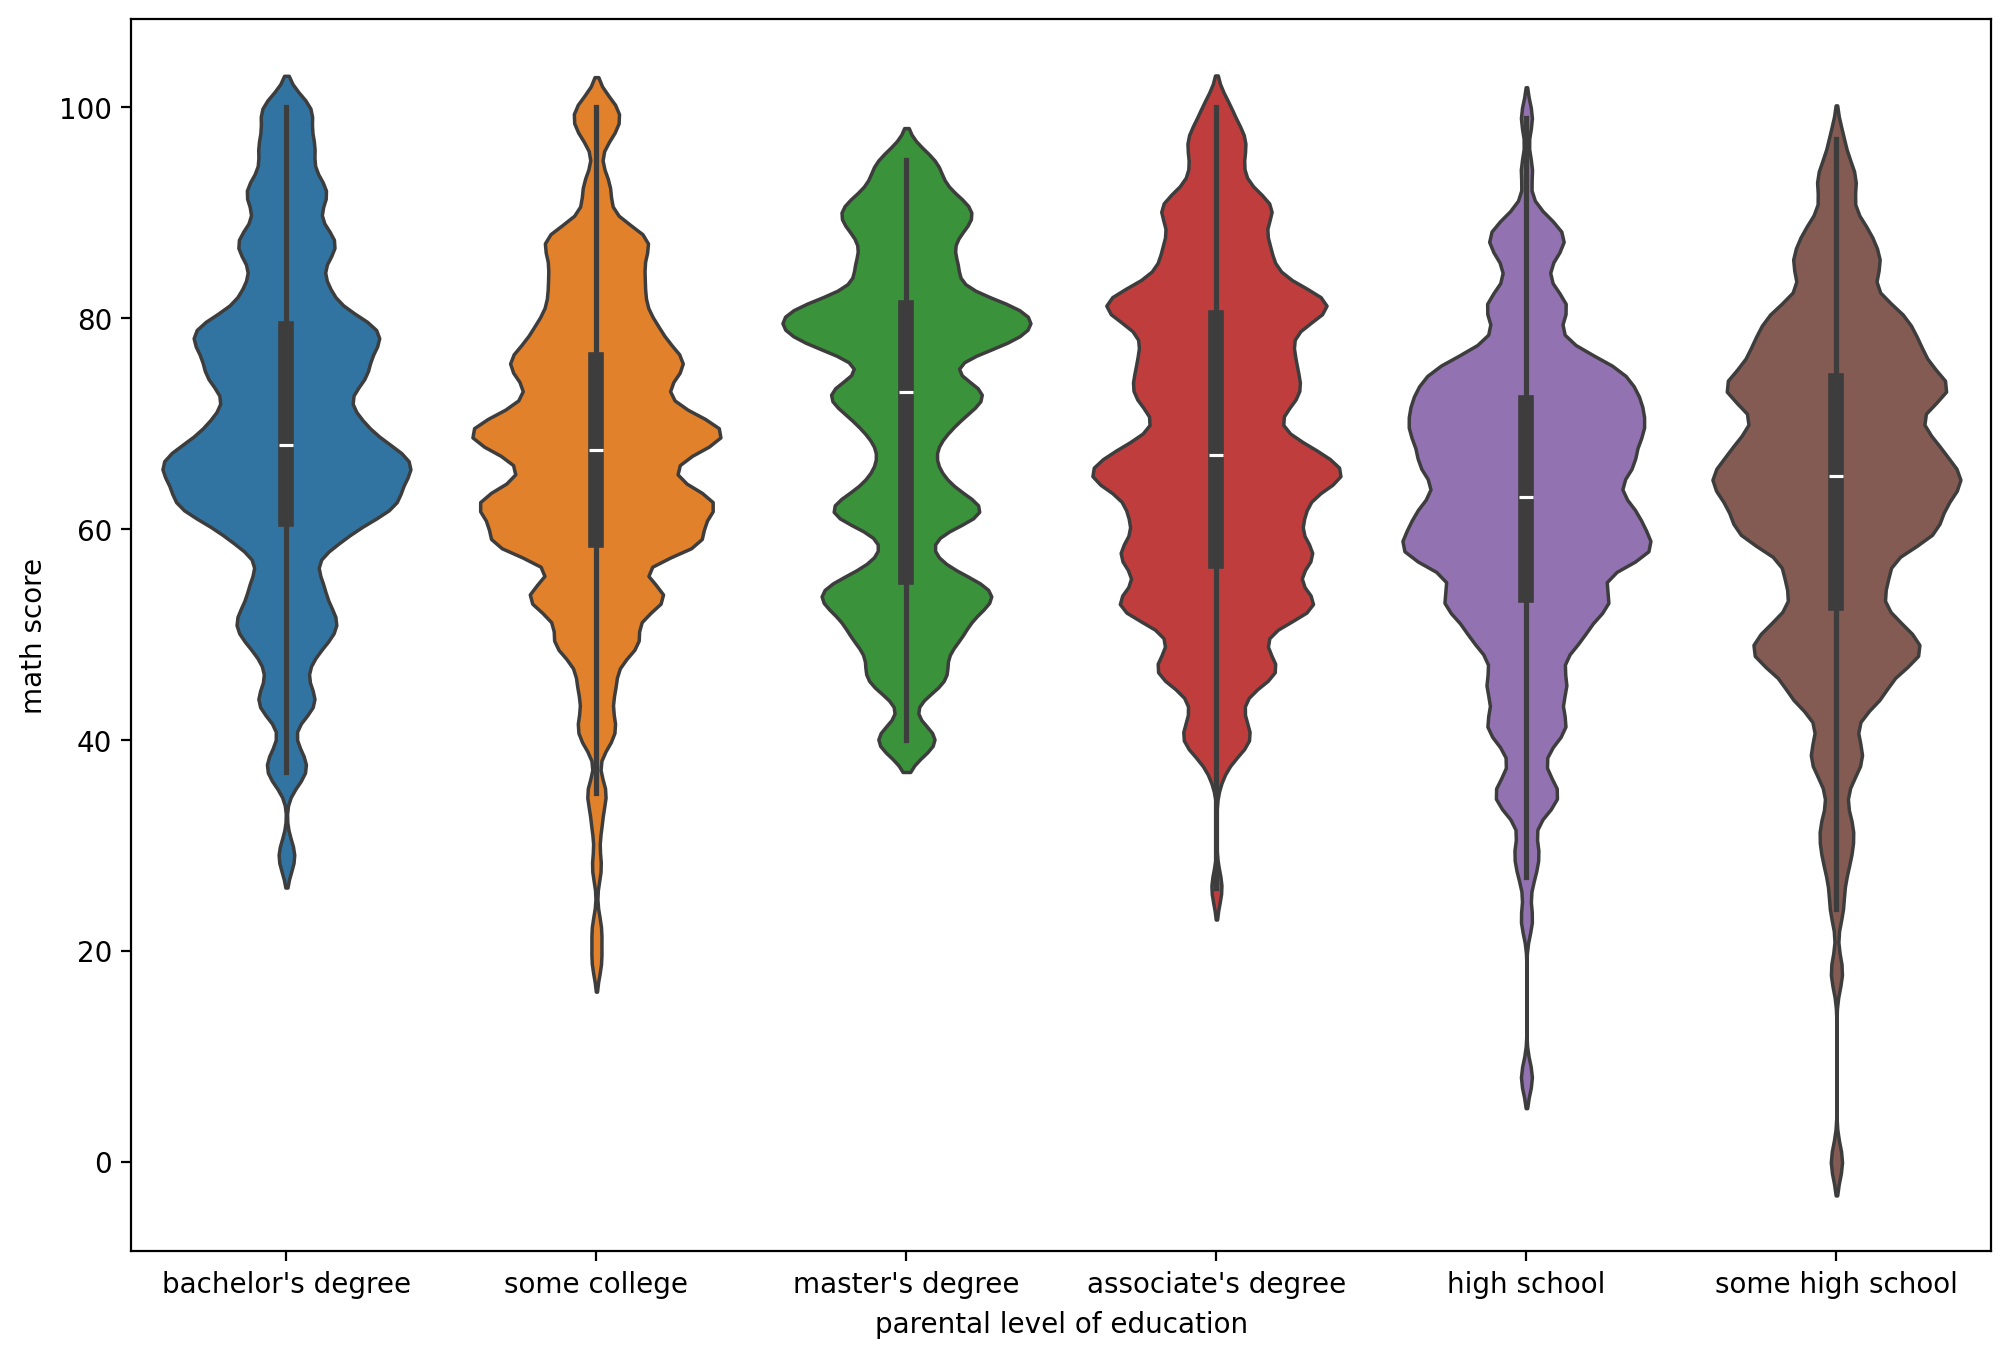

In [96]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(data=df, x='parental level of education',y='math score', hue='parental level of education', bw_method=0.1)
plt.show()

---
---

## График Swarmplot
Такой график просто отображает все точки в распределении данных. Но если точек очень много, он покажет не все точки, а их общее распределение.

Выглядит такой график следующим образом:

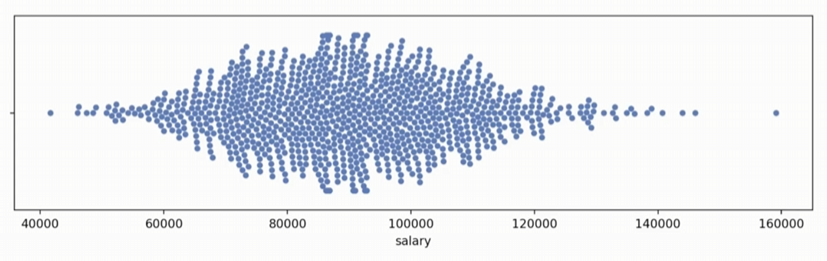

Также можно построить отдельно для каждой из категорий:

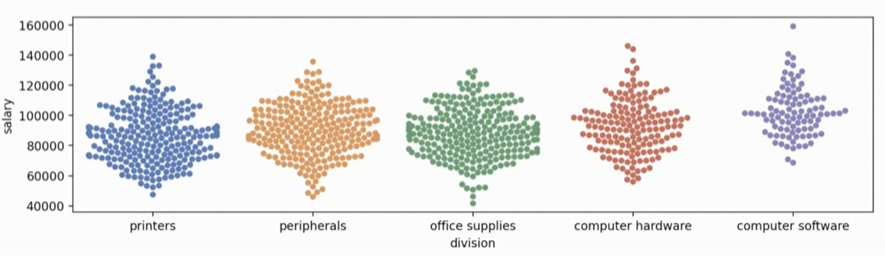

D:\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


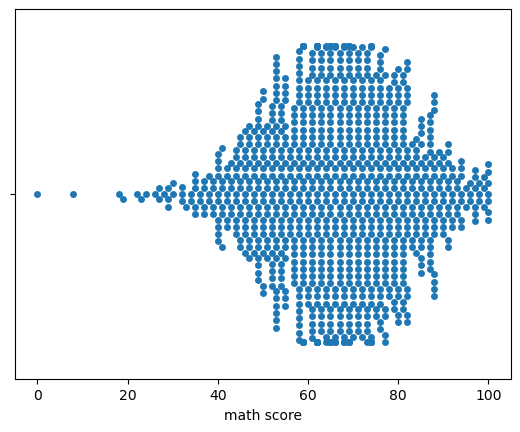

In [100]:
sns.swarmplot(data=df, x='math score')
plt.show()

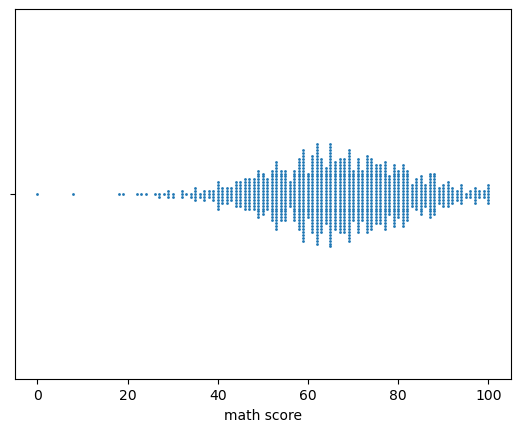

In [102]:
sns.swarmplot(data=df, x='math score', size=2)
plt.show()

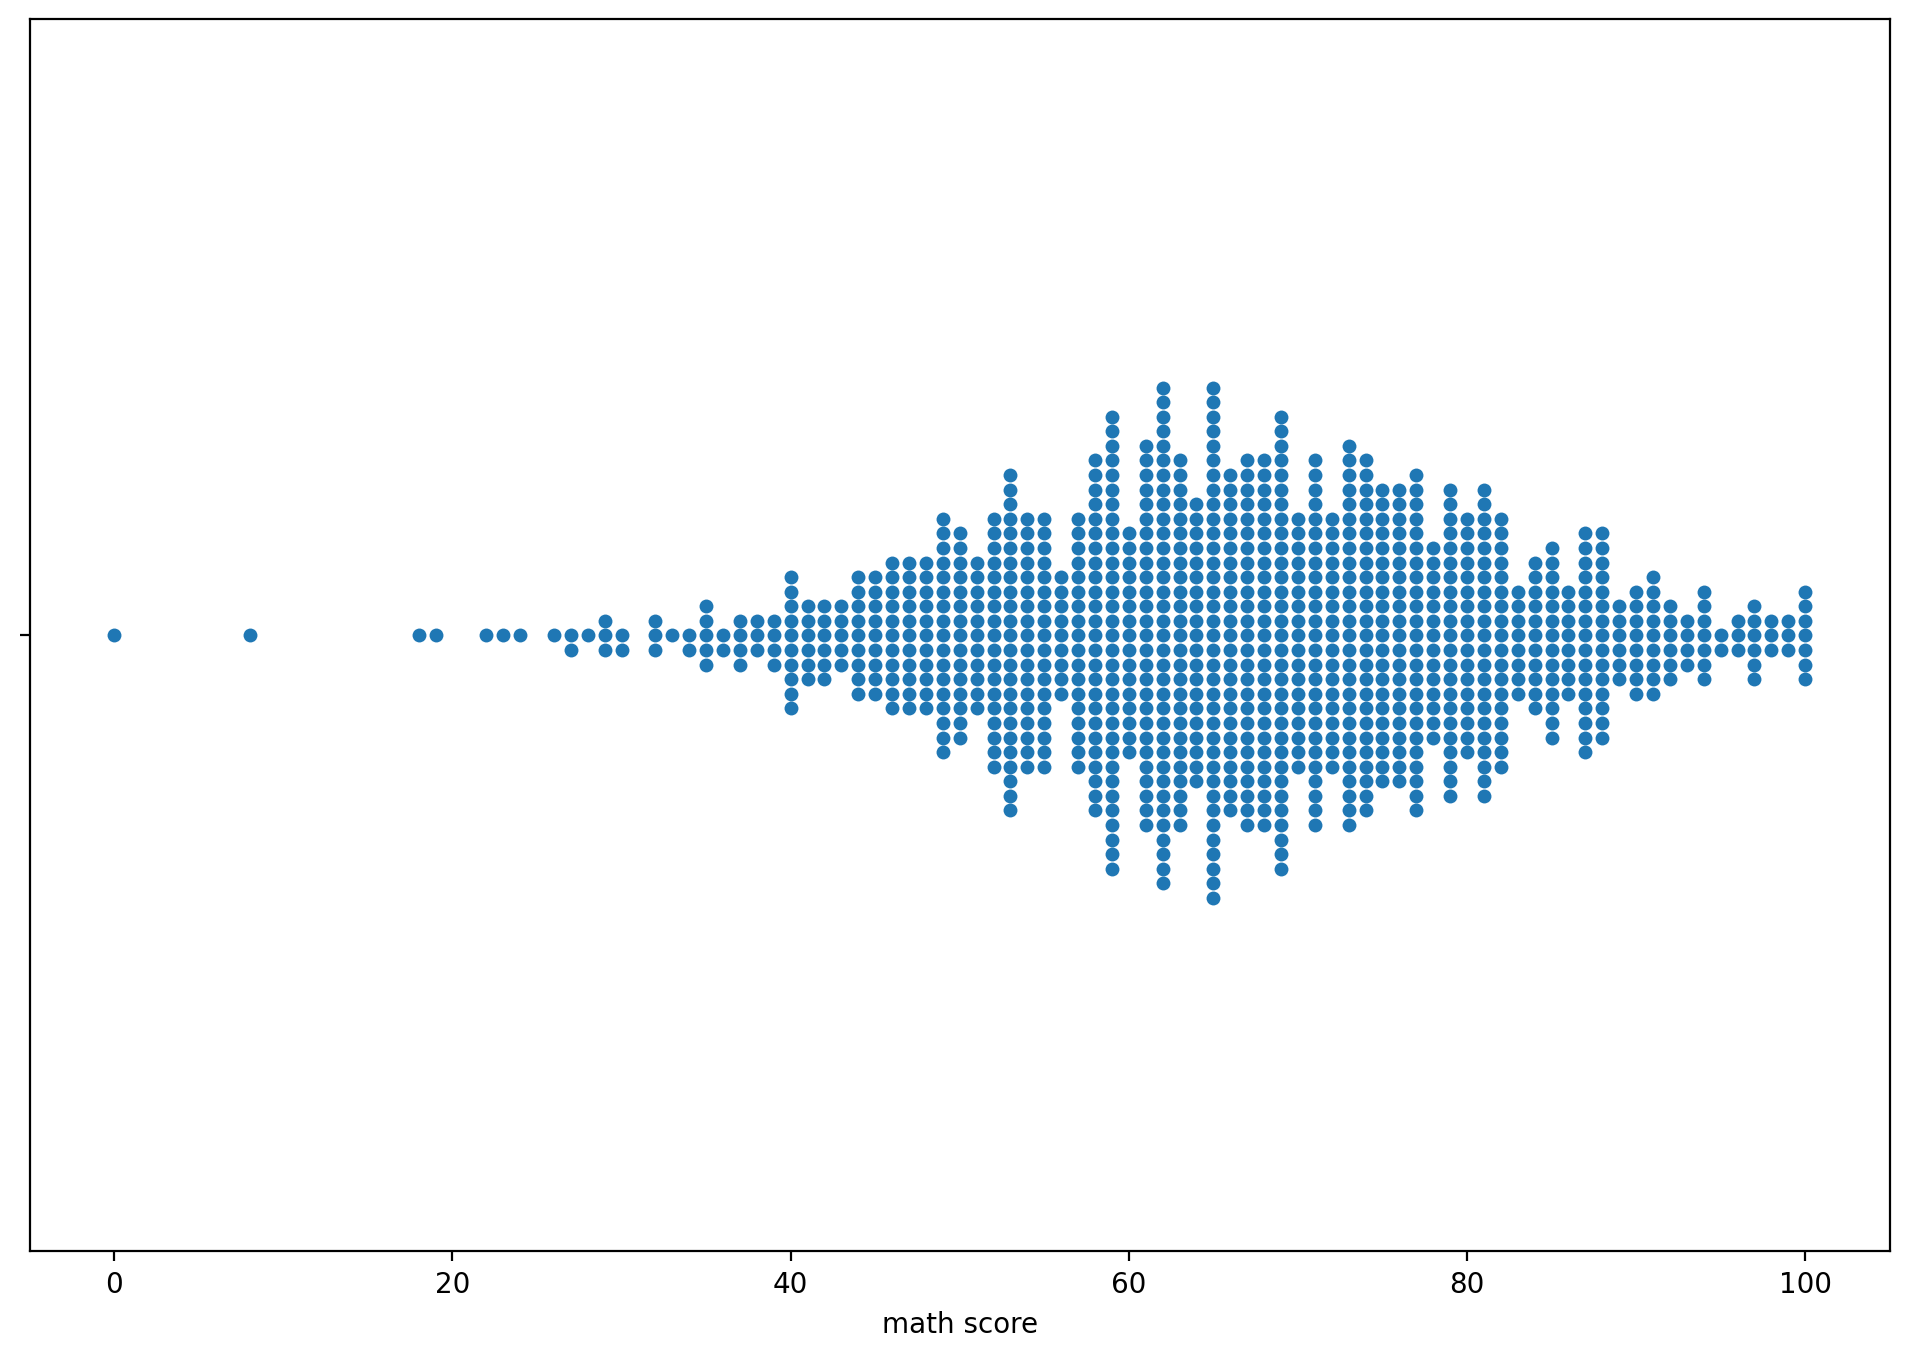

In [104]:
plt.figure(figsize=(12, 8), dpi=200)
sns.swarmplot(data=df, x='math score')
plt.show()

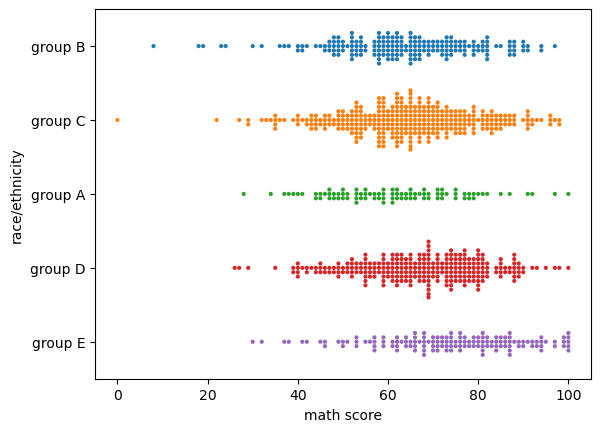

In [108]:
sns.swarmplot(data=df, x='math score', y='race/ethnicity', hue='race/ethnicity', size=3)
plt.show()

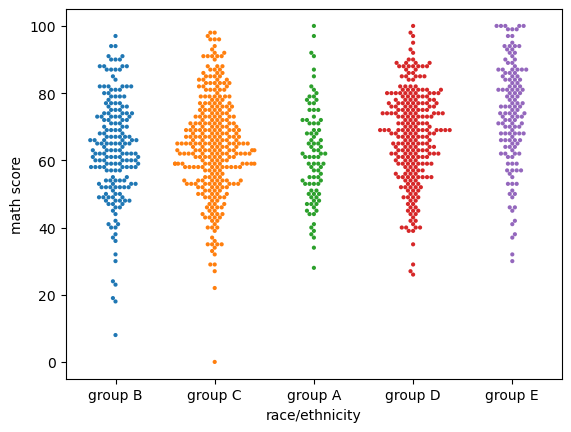

In [110]:
sns.swarmplot(data=df, x='race/ethnicity', y='math score', hue='race/ethnicity', size=3)
plt.show()

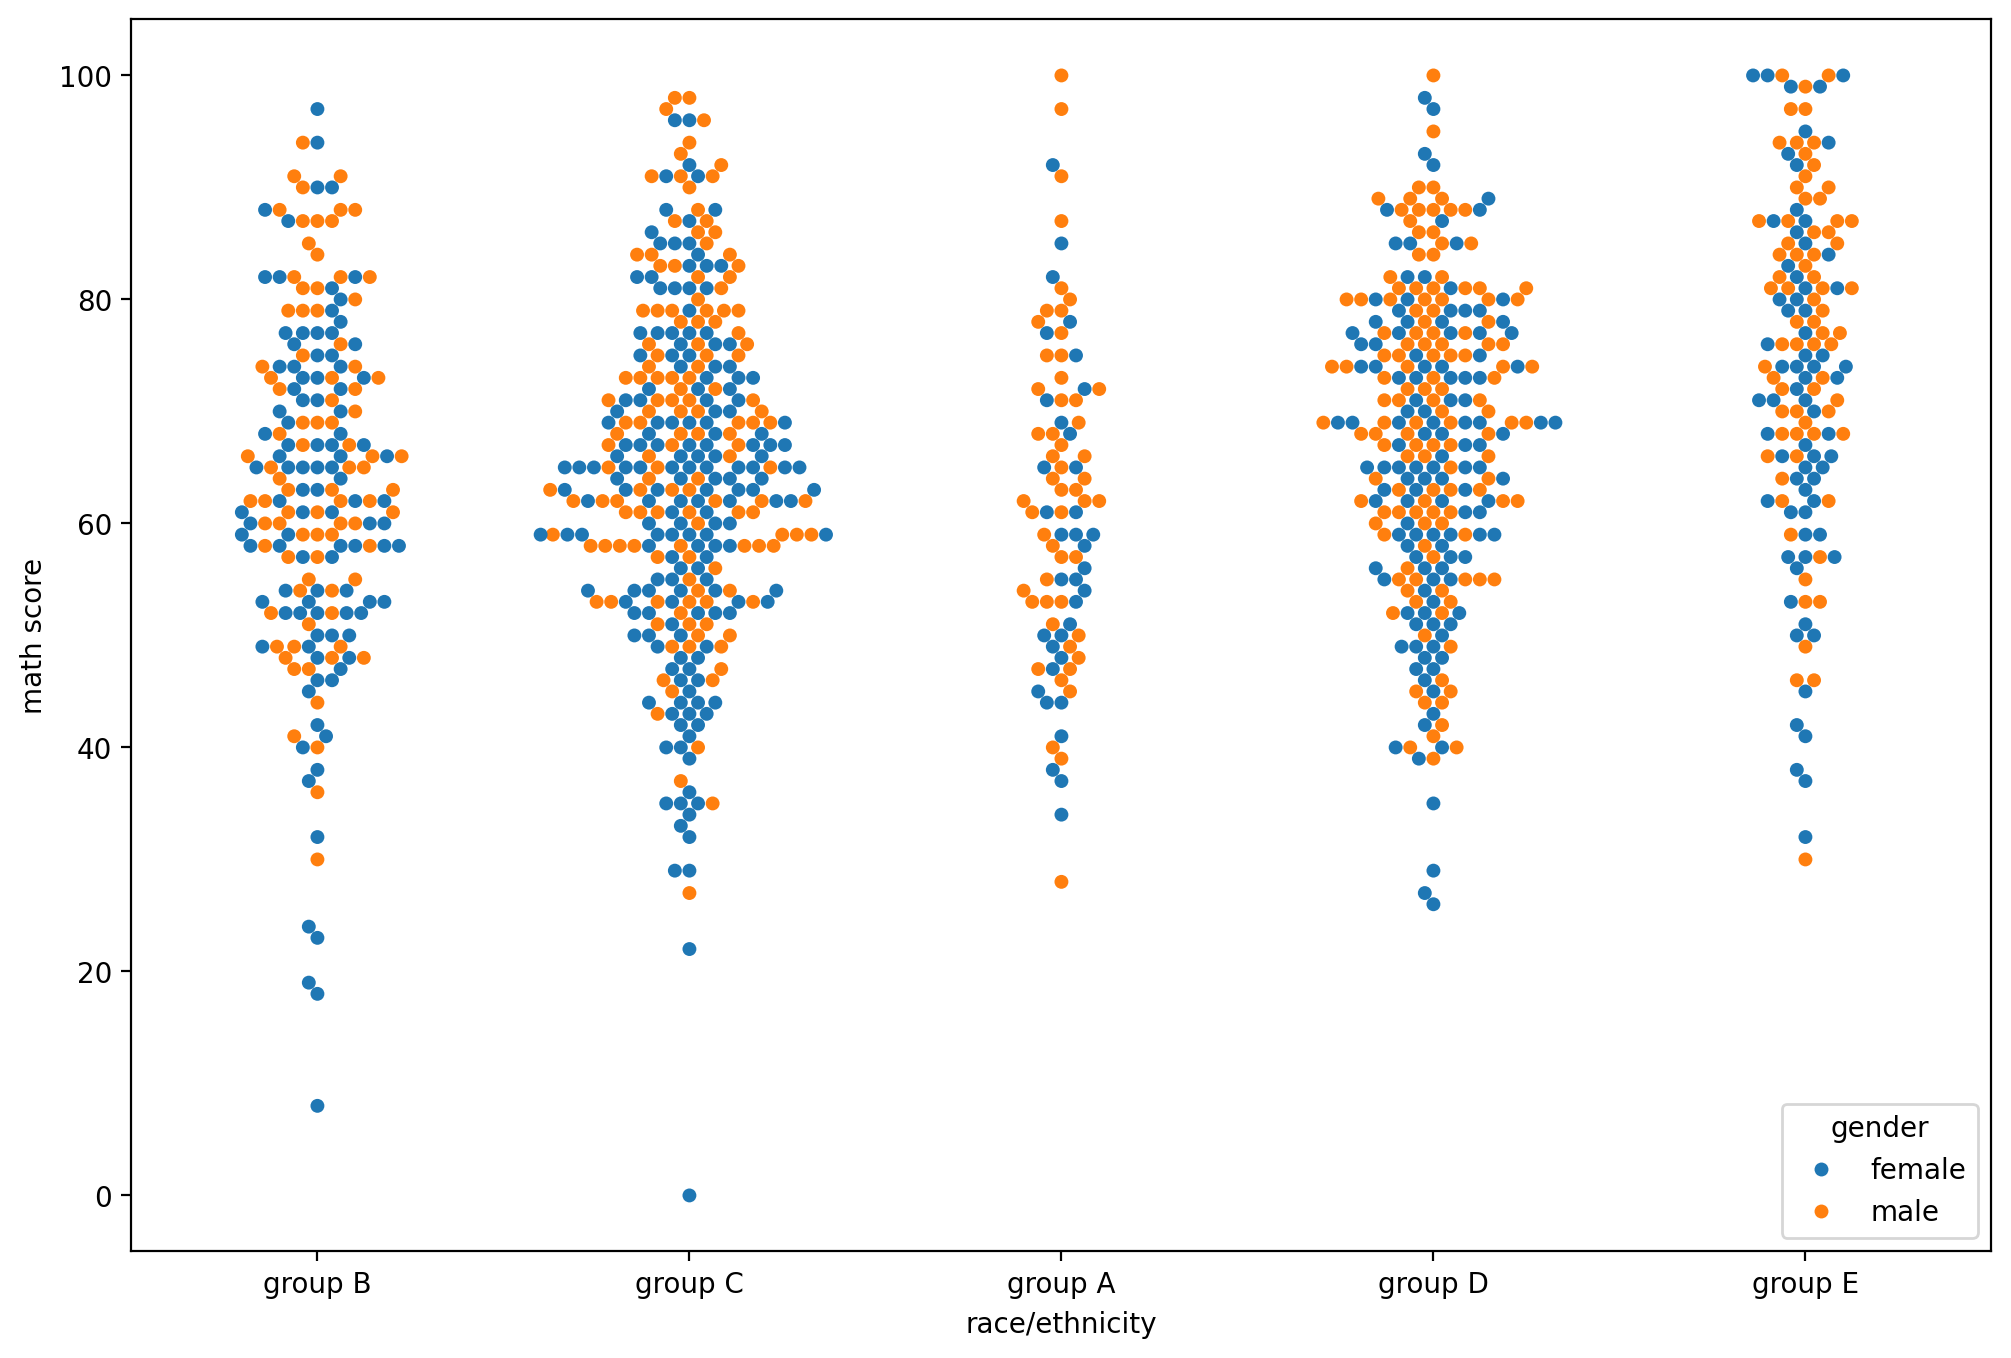

In [112]:
plt.figure(figsize=(12, 8), dpi=200)
sns.swarmplot(data=df, x='race/ethnicity', y='math score', hue='gender')
plt.show()

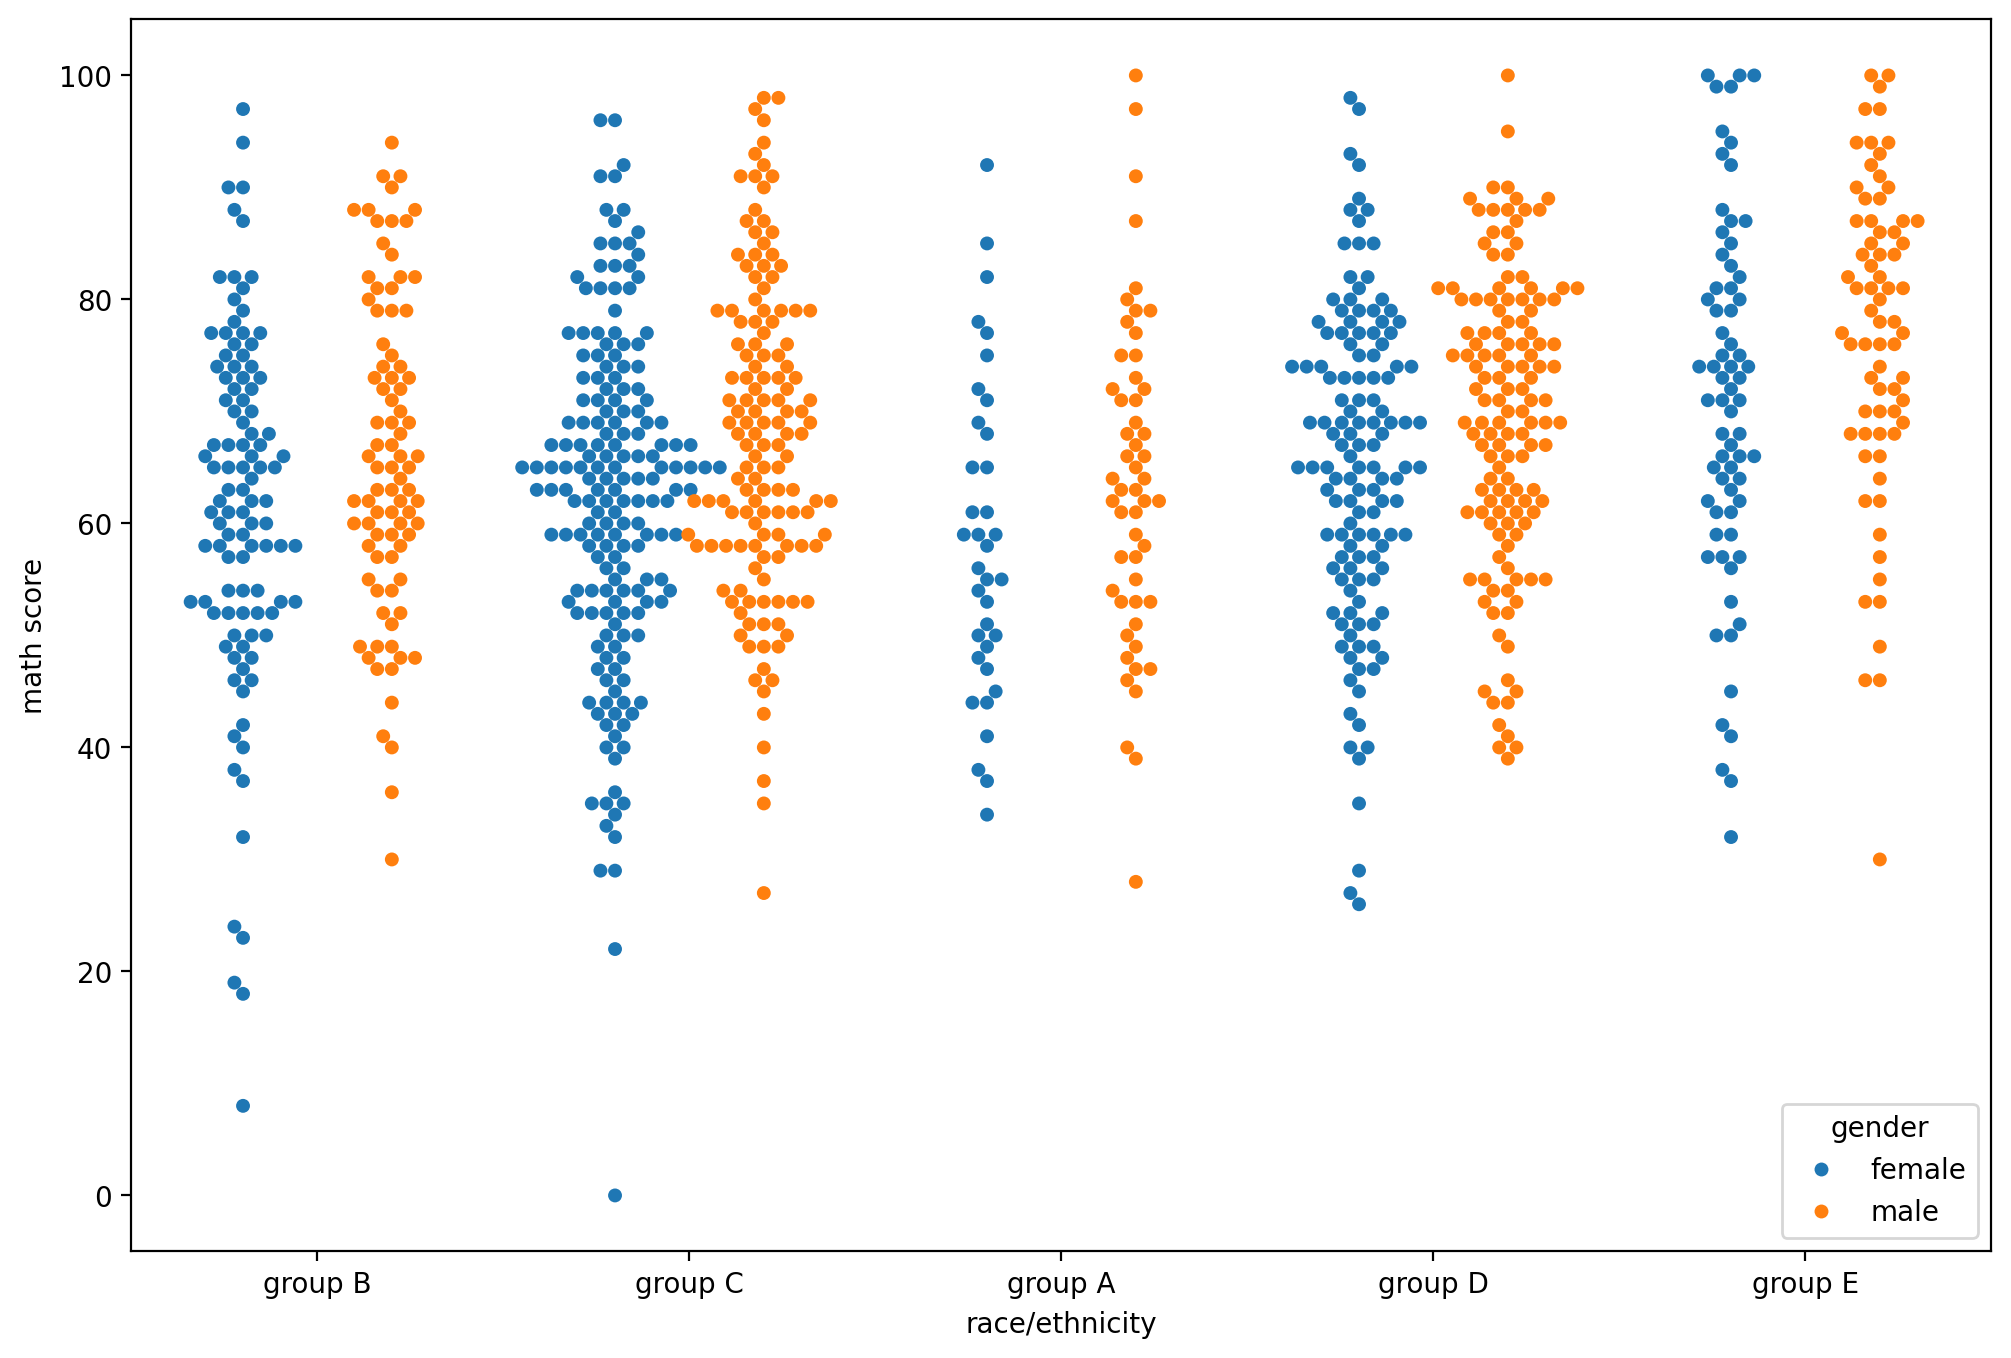

In [114]:
plt.figure(figsize=(12, 8), dpi=200)
sns.swarmplot(data=df, x='race/ethnicity', y='math score', hue='gender', dodge=True)
plt.show()

---
---

## График Boxenplot.
Был разработан как расширение обычного boxplot.

Официальное описание этого графика: https://vita.had.co.nz/papers/letter-value-plot.html

Этот стиль графика изначально назывался “letter value” - порядковые статистики, потому что он показывает бОльшее количество квантилей. Такие графики похожи на box plot - они рисуют непараметрическое представление распределения, в котором все значения соответствуют фактическим наблюдениям. Добавляя всё больше и больше квантилей, график позволяет увидеть форму распределения, особенно в "хвостах" диапазонов.

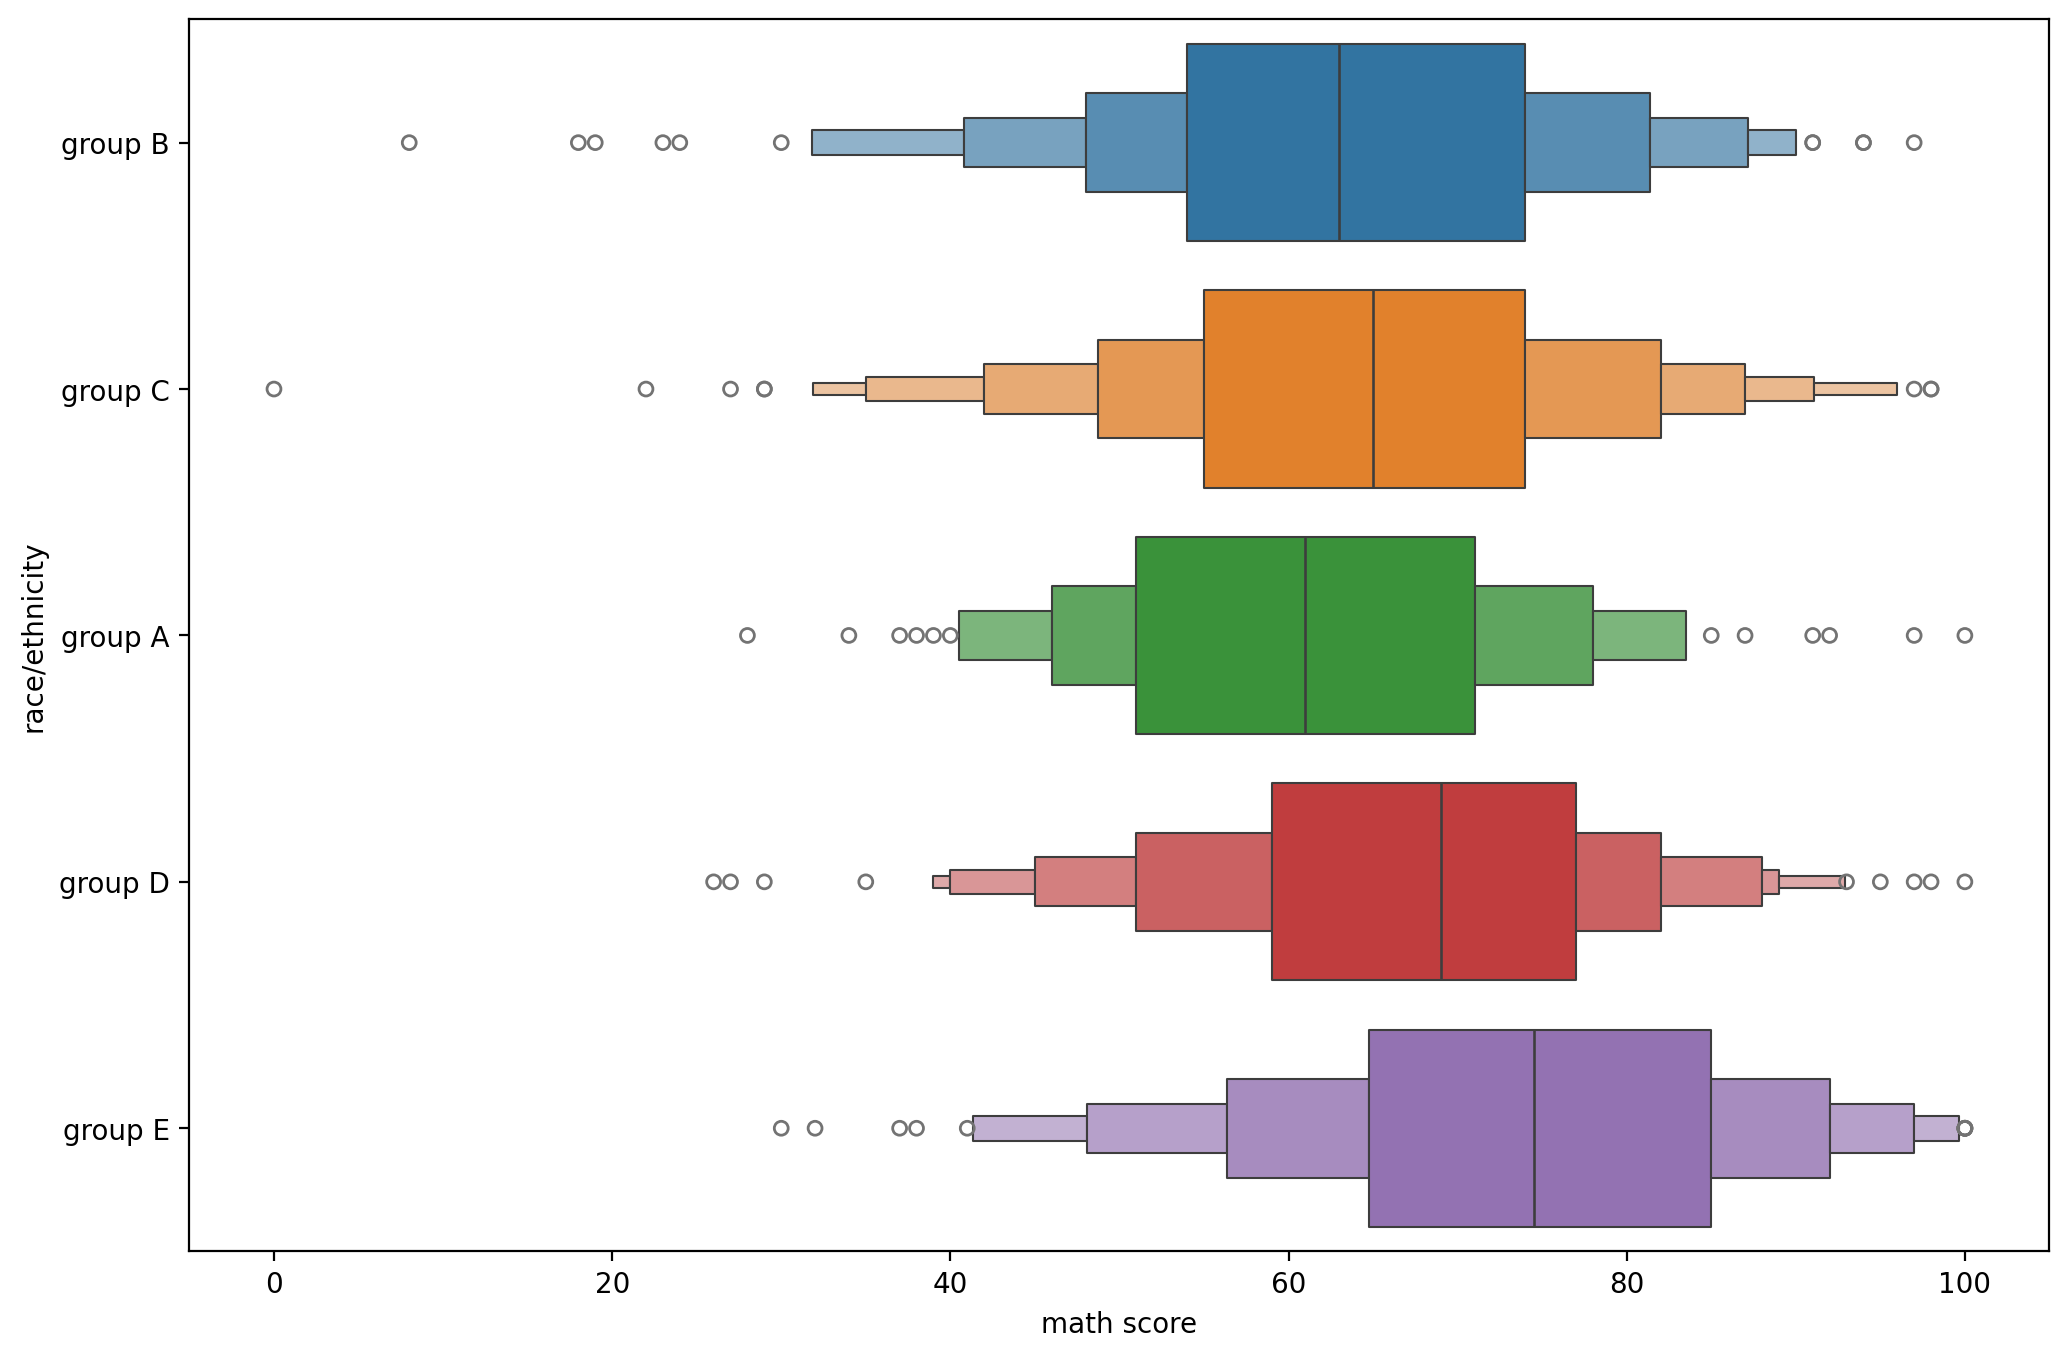

In [120]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxenplot(data=df, x='math score', y='race/ethnicity', hue='race/ethnicity')
plt.show()

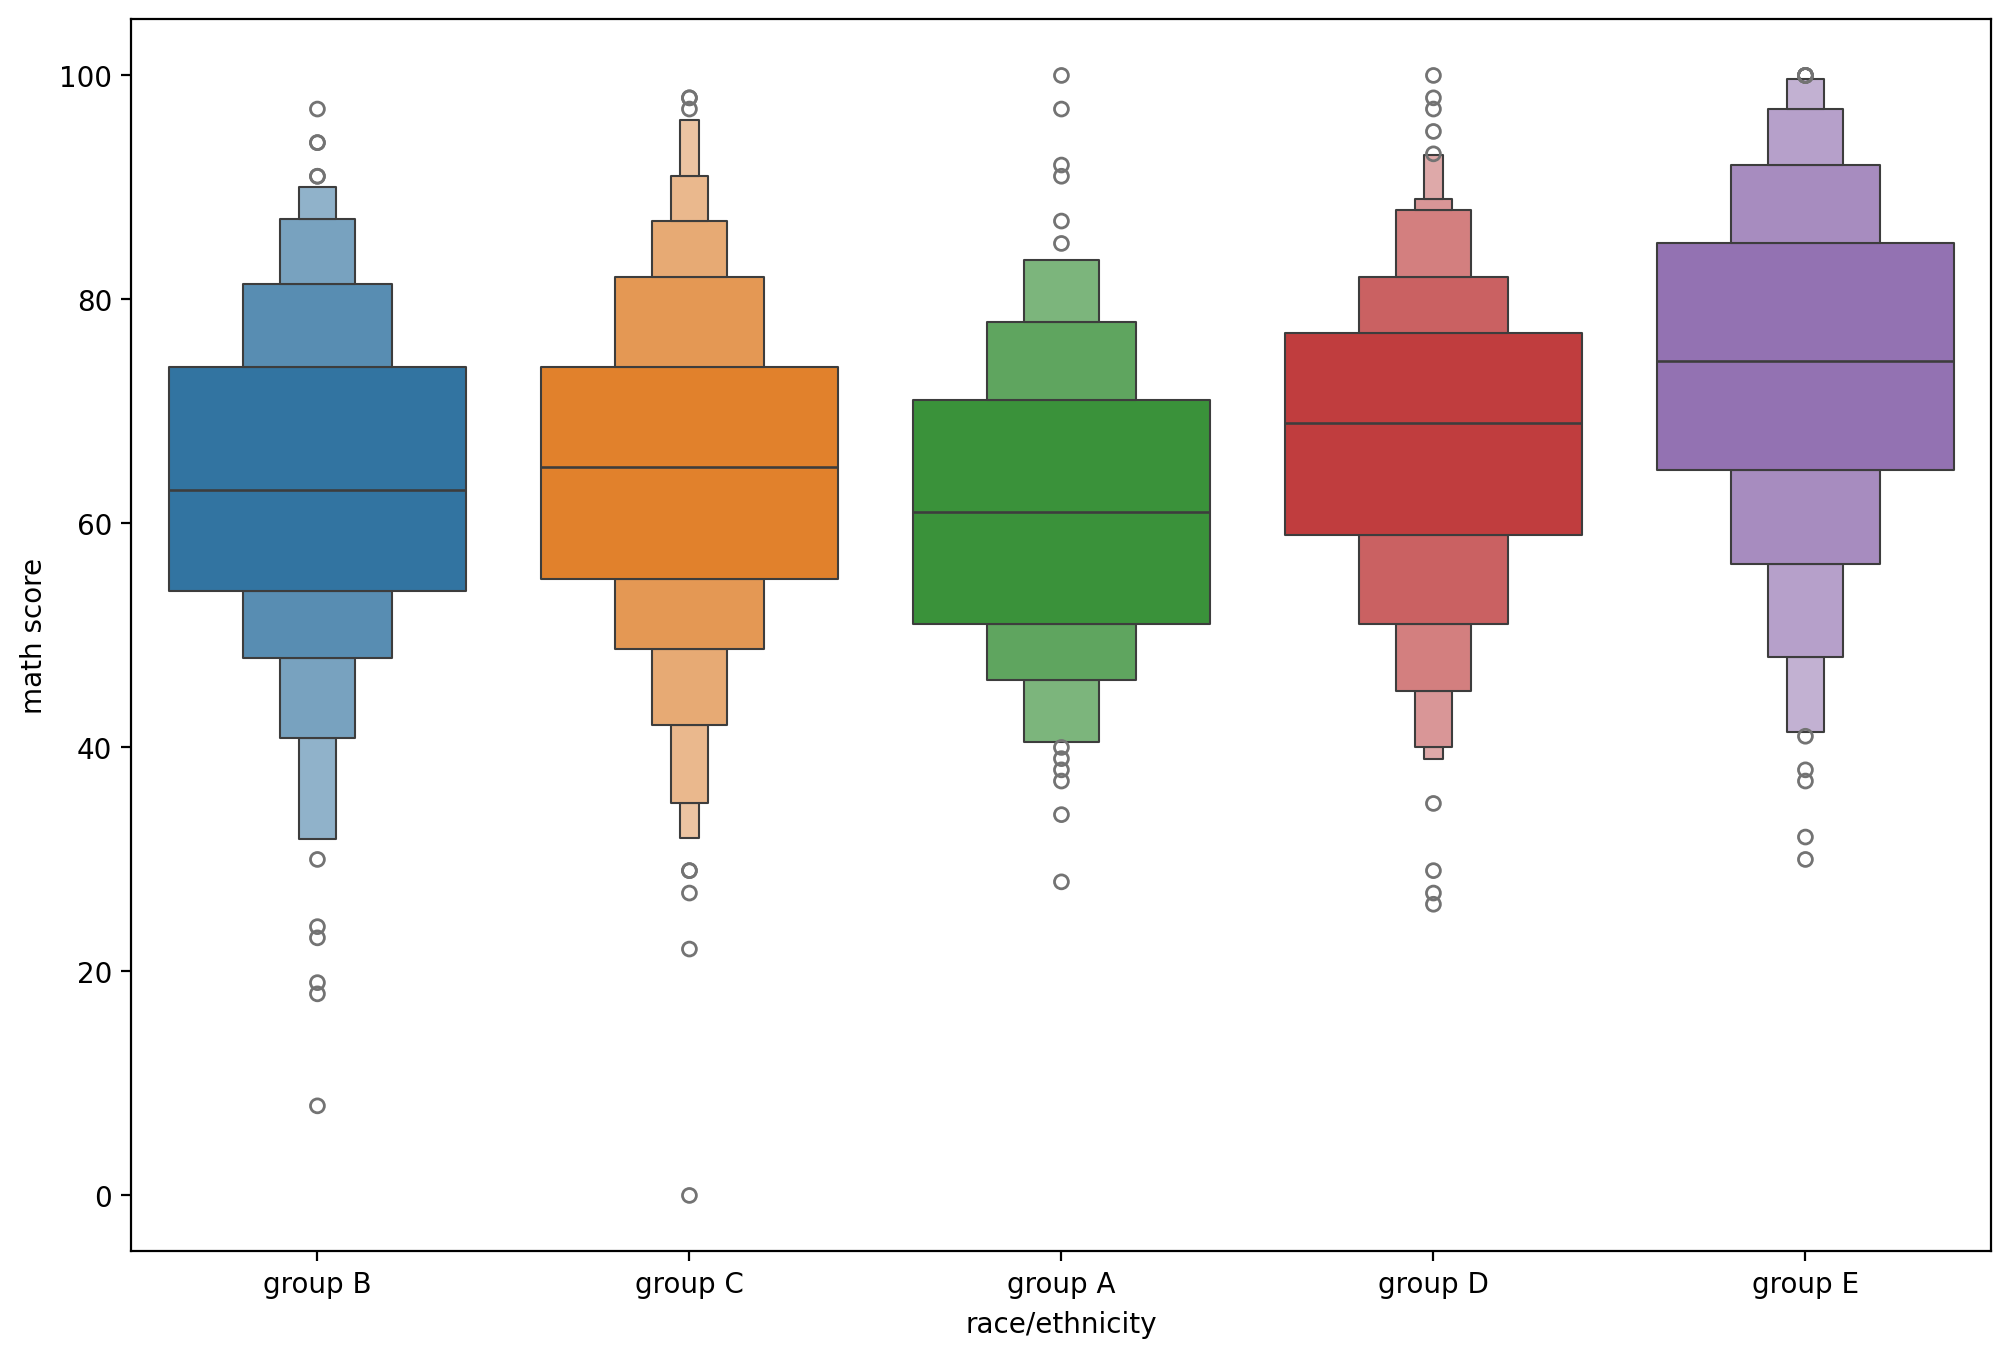

In [122]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxenplot(data=df, x='race/ethnicity', y='math score', hue='race/ethnicity')
plt.show()

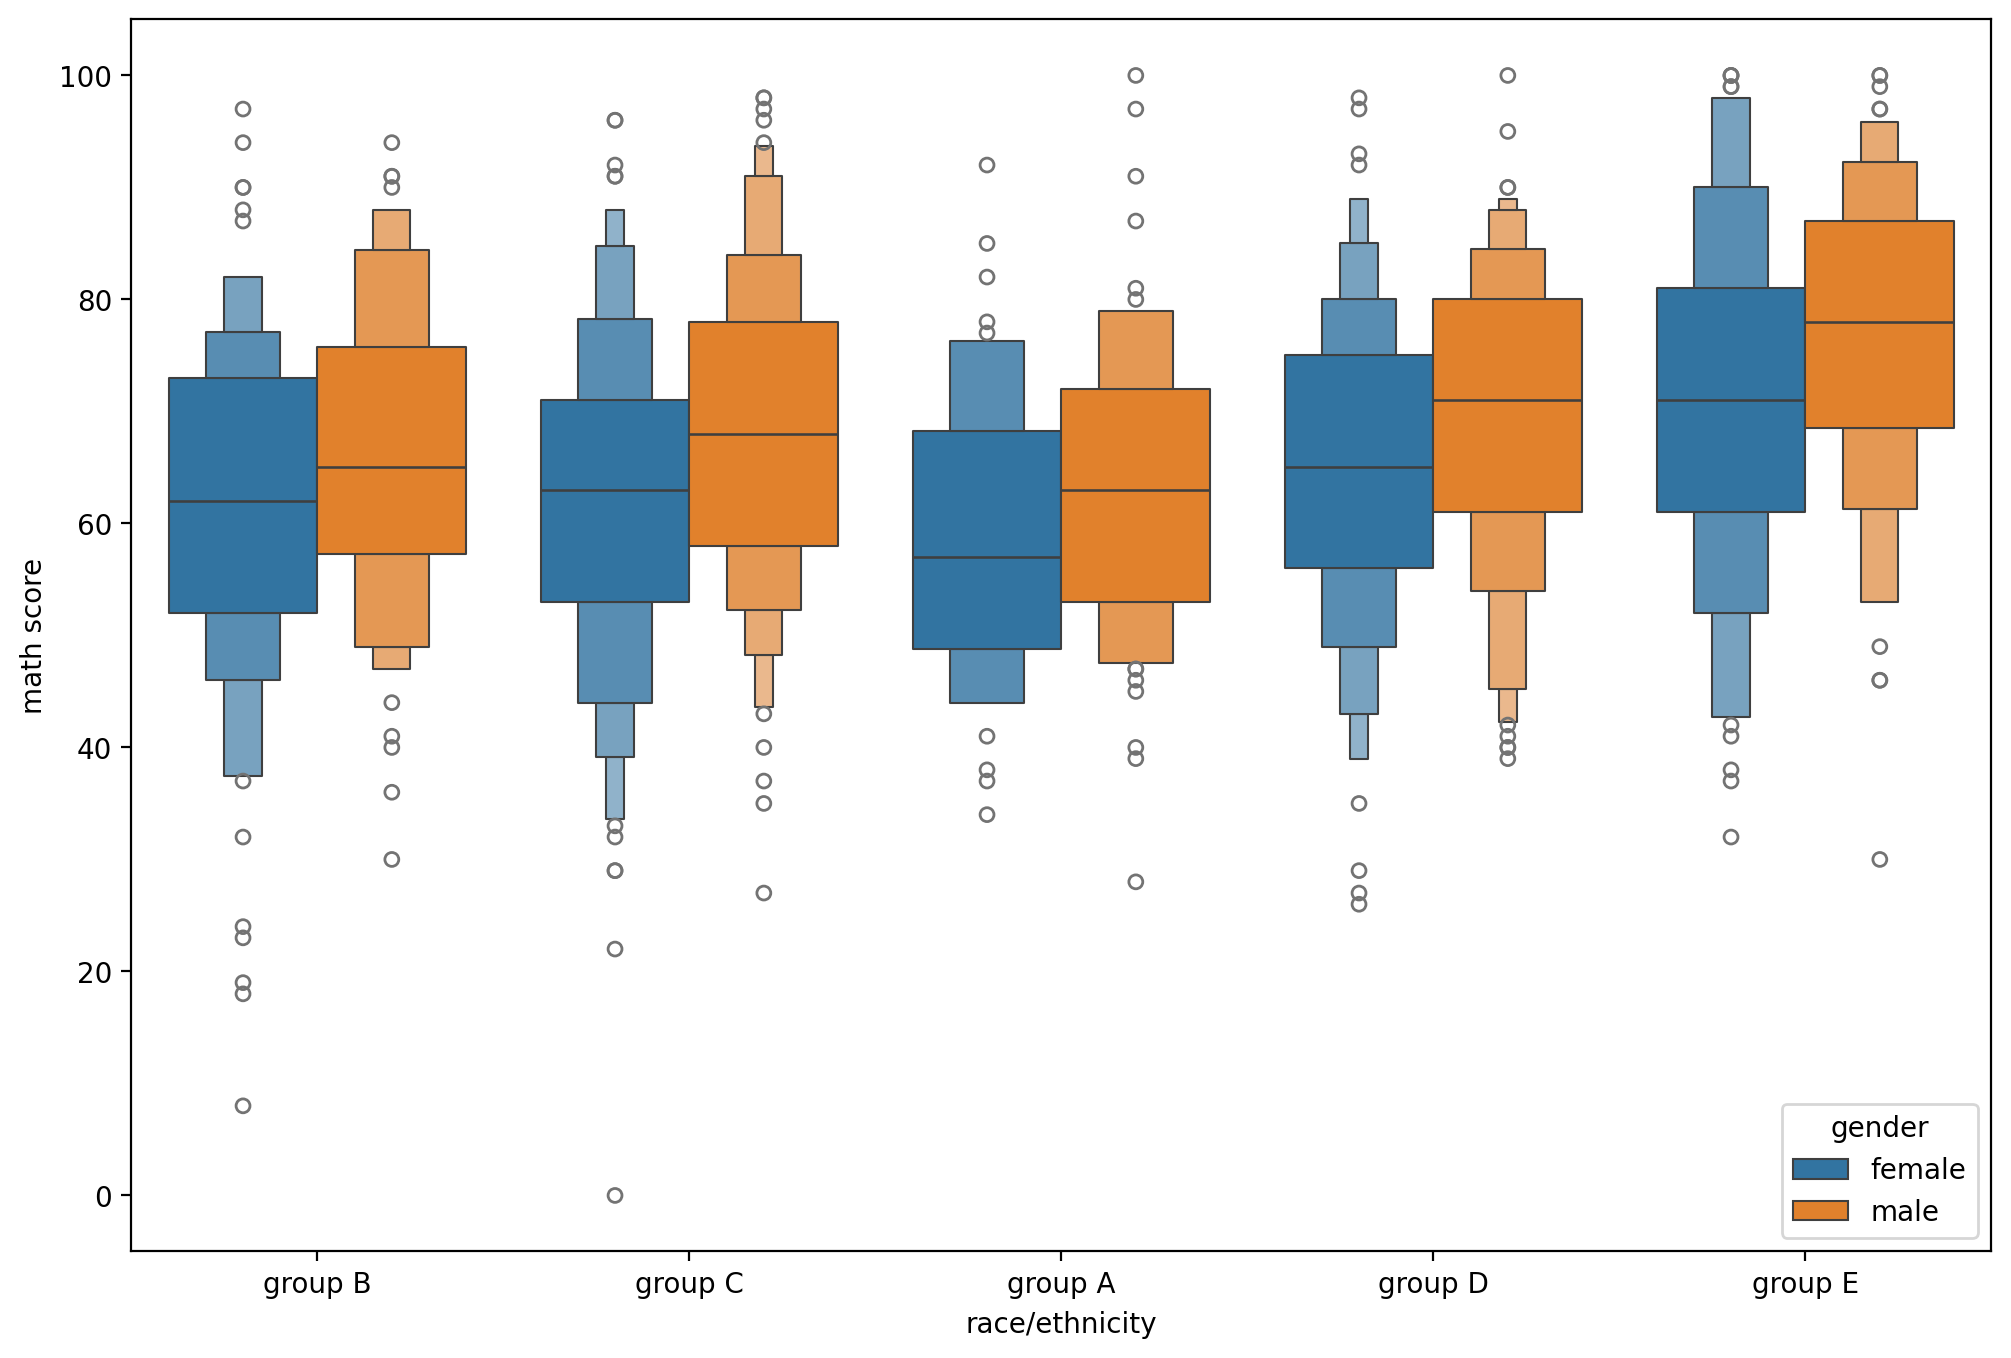

In [124]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxenplot(data=df, x='race/ethnicity', y='math score', hue='gender')
plt.show()

---